# <a> 1. Importing libraries

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Importing required packages
import pandas as pd
import glob,os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
#import miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)


# <a> 2. Data understanding

In [3]:
matches=pd.read_csv('matches.csv')

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2014-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


From above we can observe following points:<br>
1) Mumbai indians have won maximum number of tosses & matches as compared to other teams.<br>
2) CH Gayle has been the player_of_match maximum number of times.<br>
3) HDPK Dharmasena has been the 1st Umpire for maximum number of matches.<br>
4) C Shamshuddin has been the 2nd Umpire for maximum number of matches.

In [6]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


# <a> 3. Performing EDA

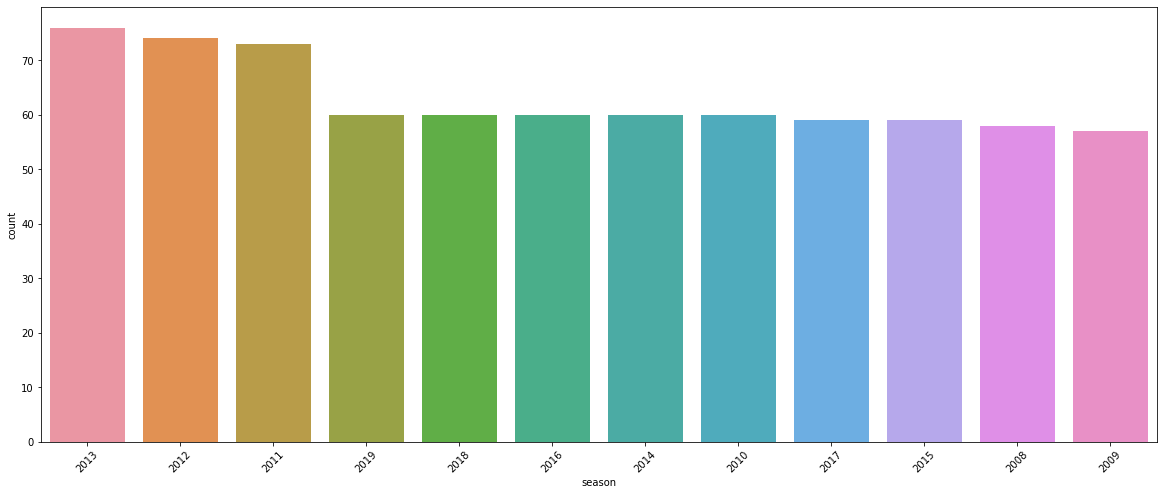

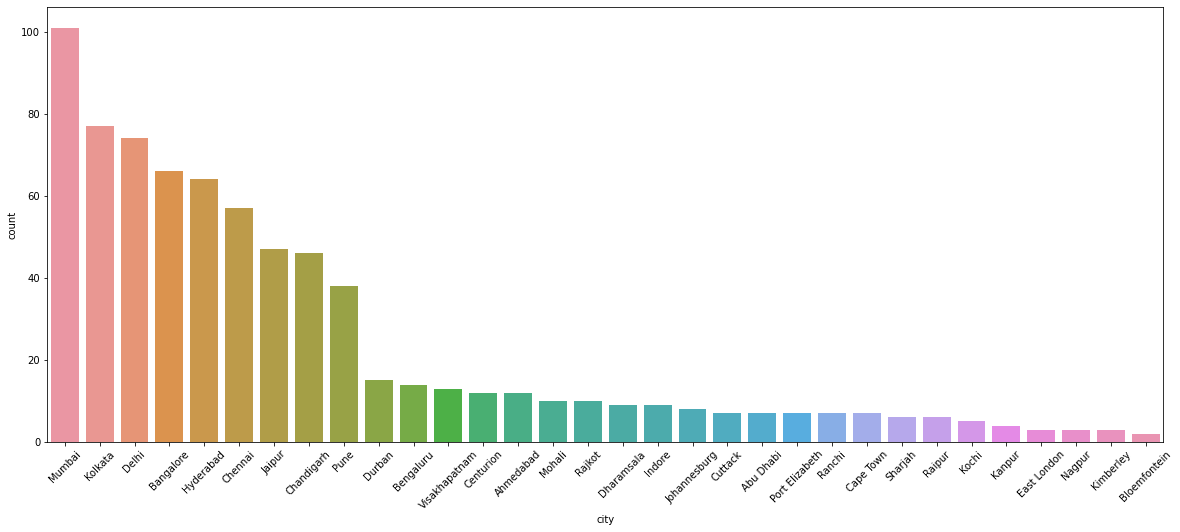

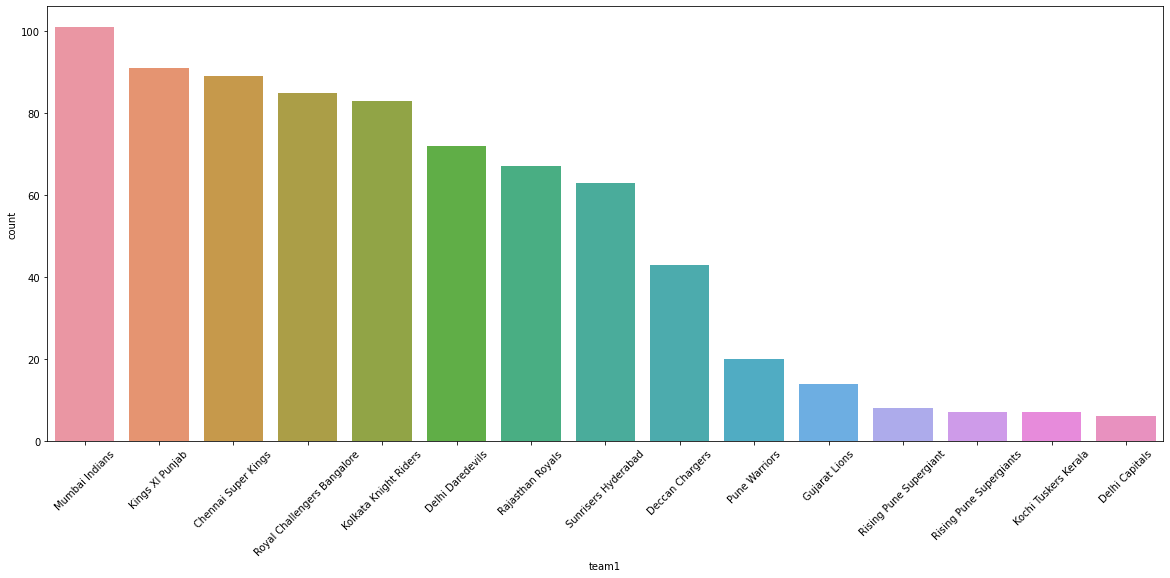

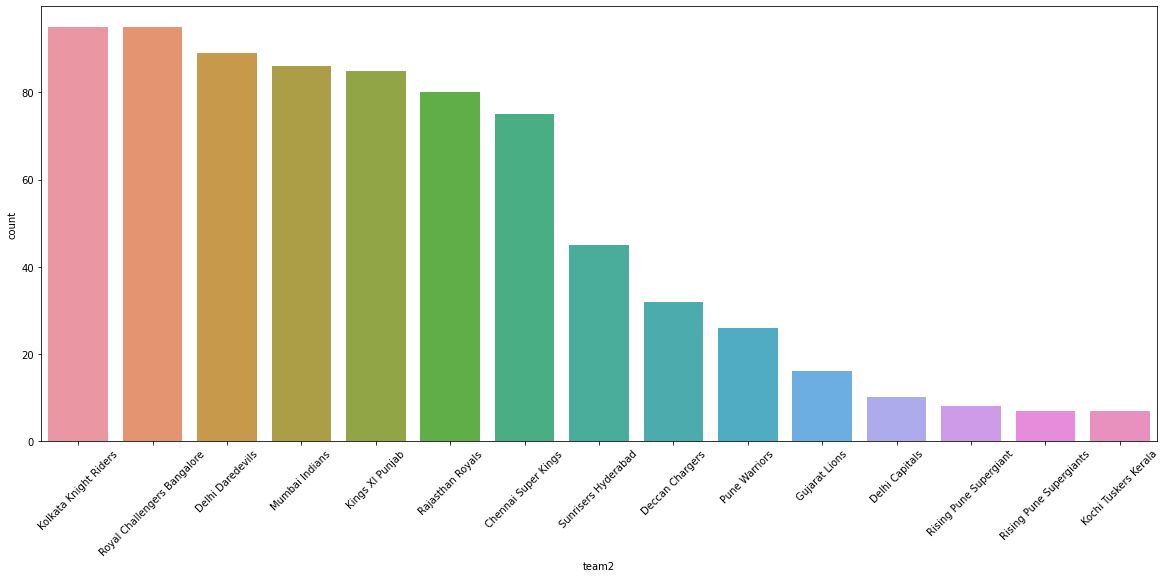

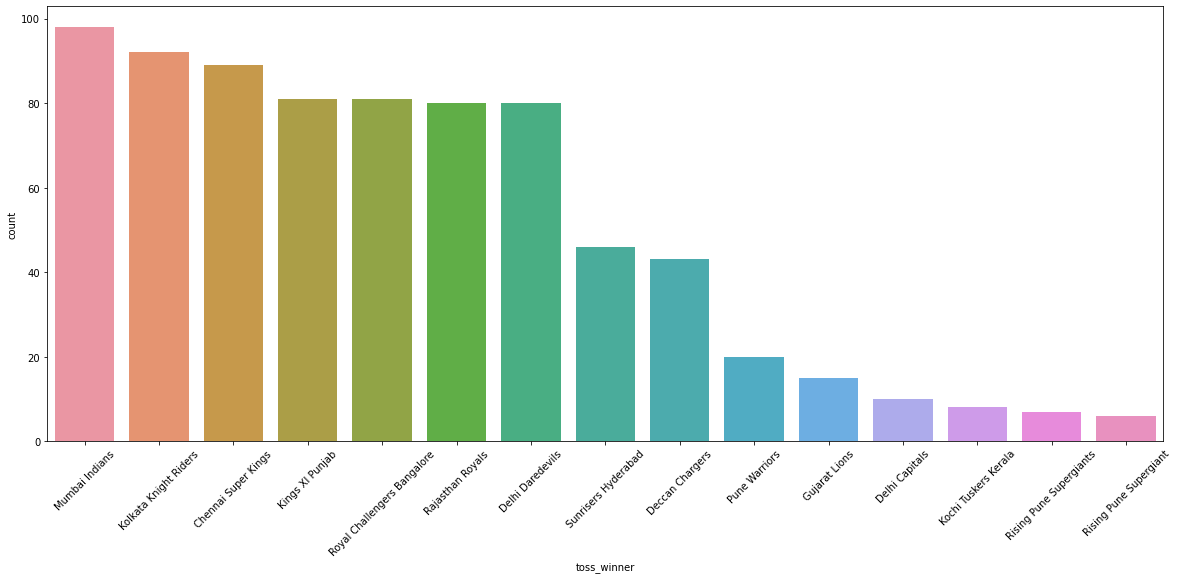

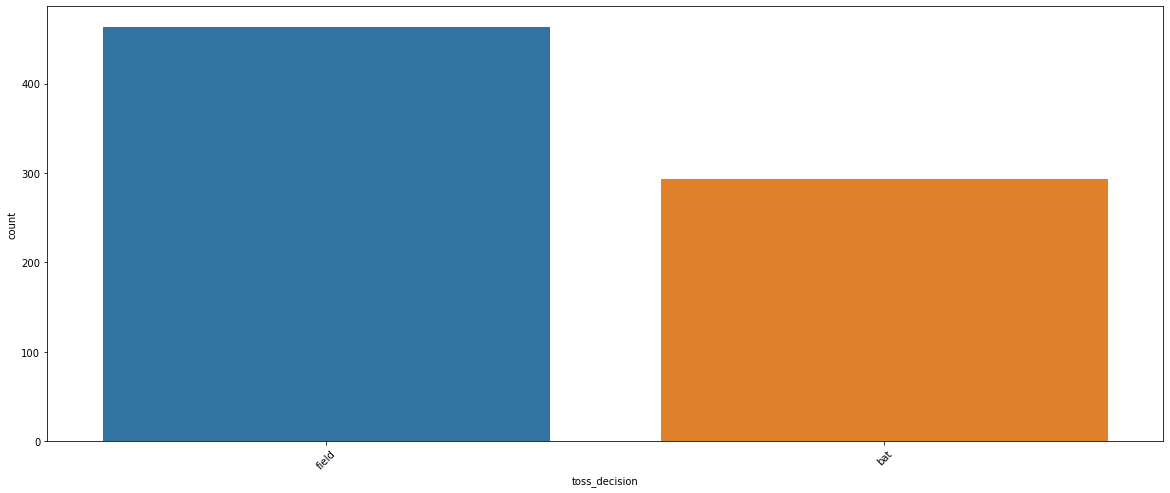

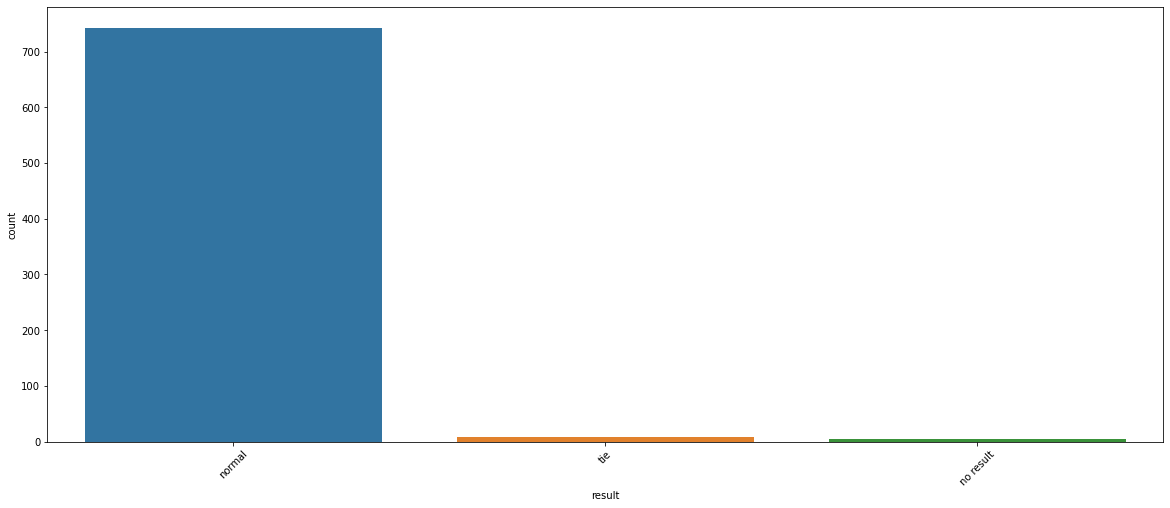

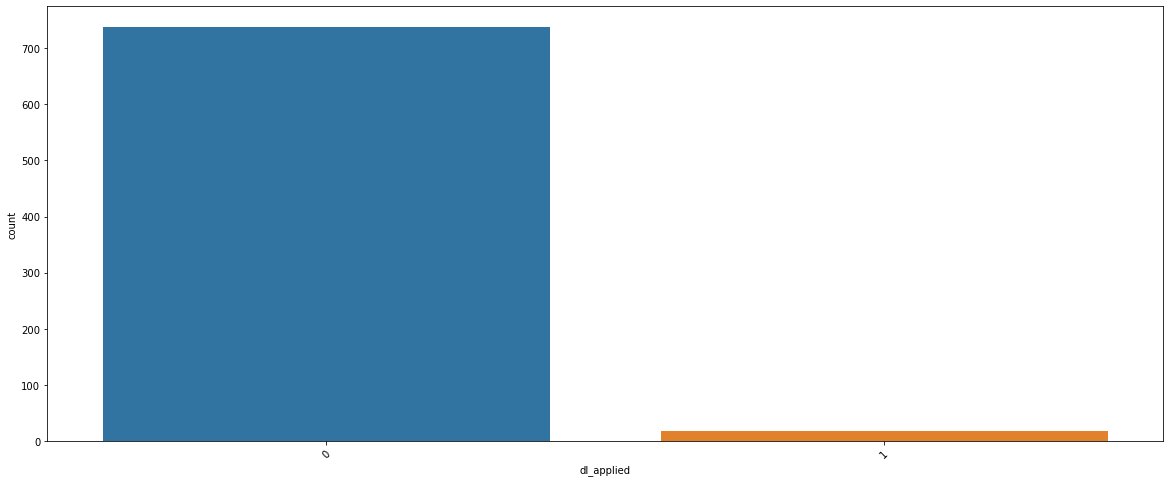

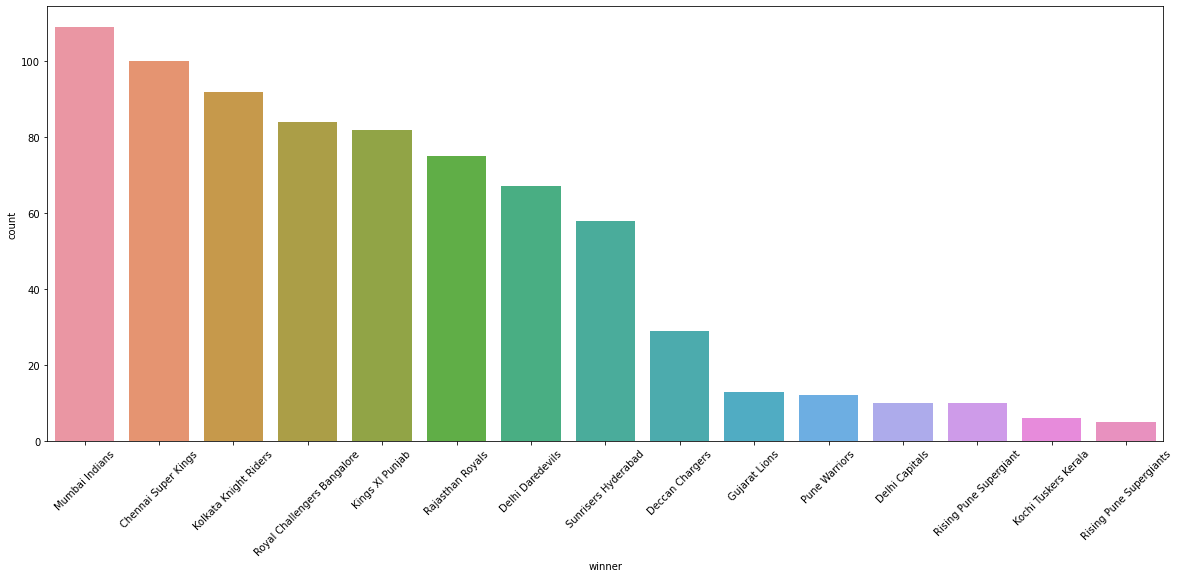

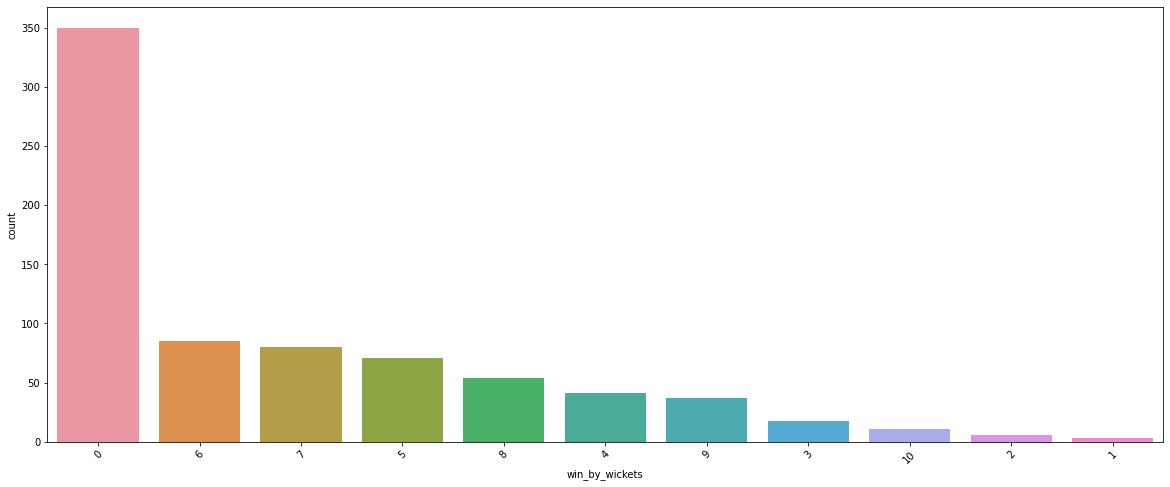

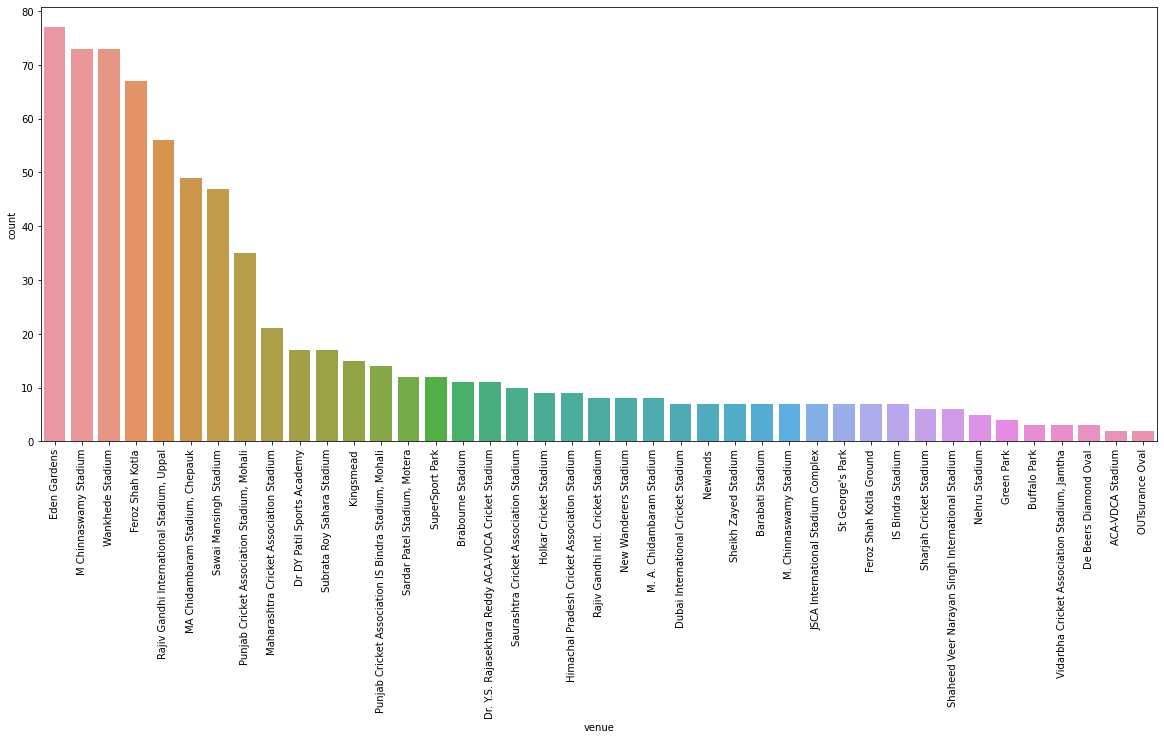

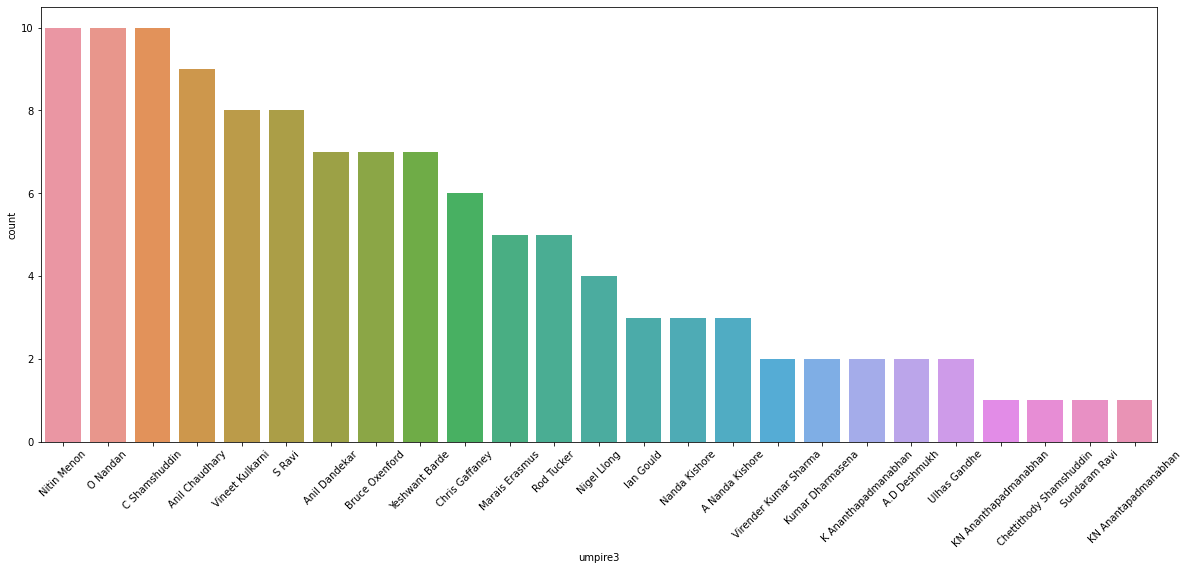

In [9]:
# Observing Countplots for dataframe -'matches'
cols = matches.columns
for i in cols:
    if matches[i].nunique() <45:
        plt.figure(figsize =(20,8))
        ax = sns.countplot(matches[i], order = matches[i].value_counts().index)
        if matches[i].nunique() >35:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=45)
        plt.show()

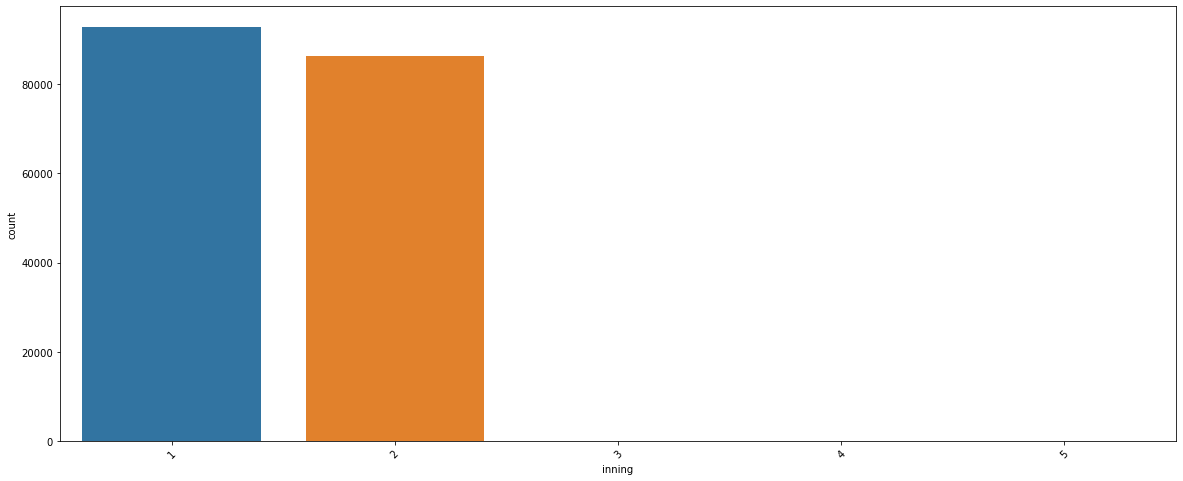

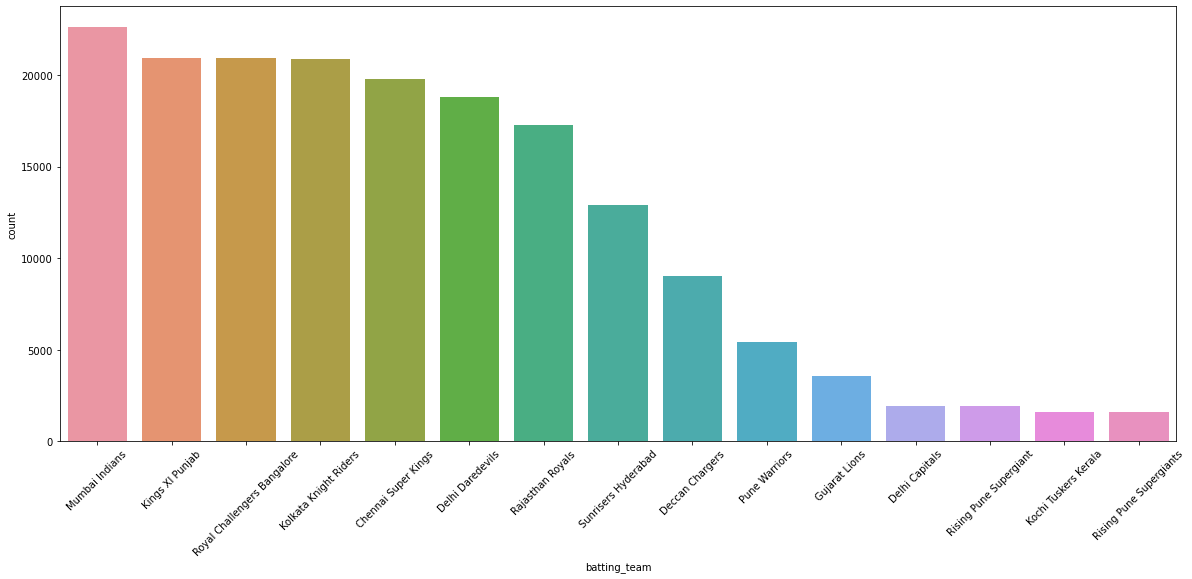

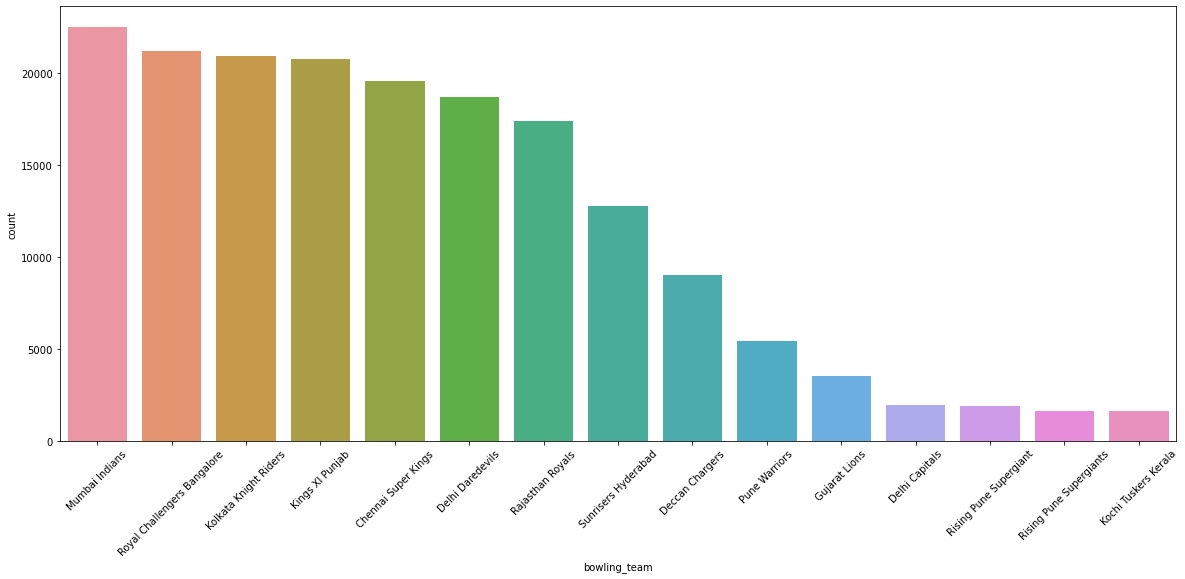

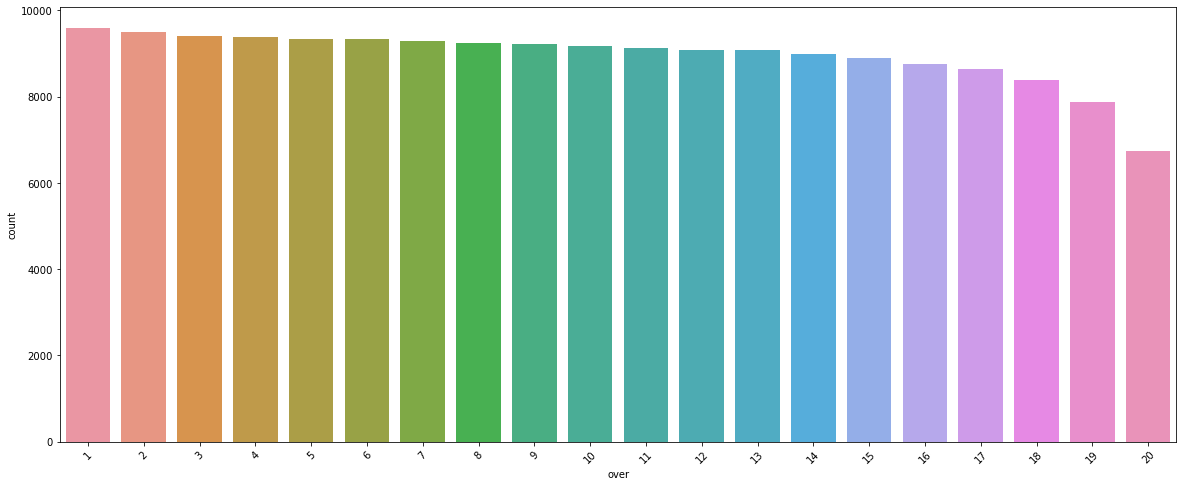

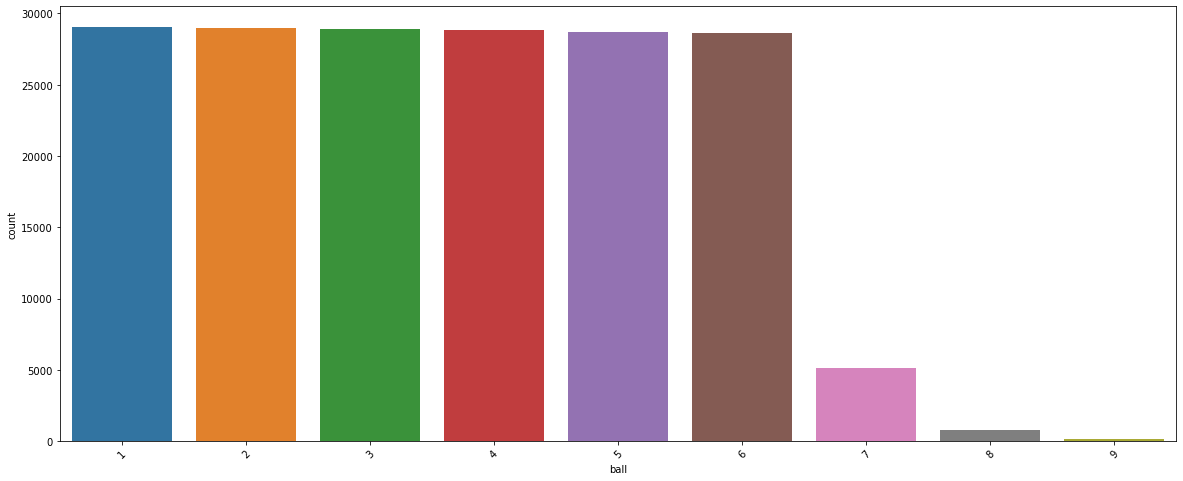

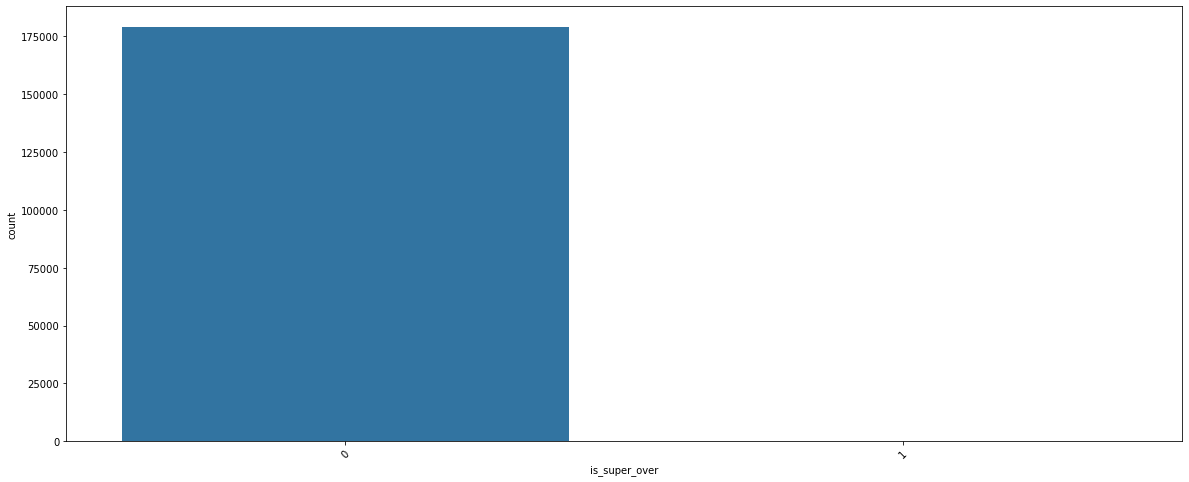

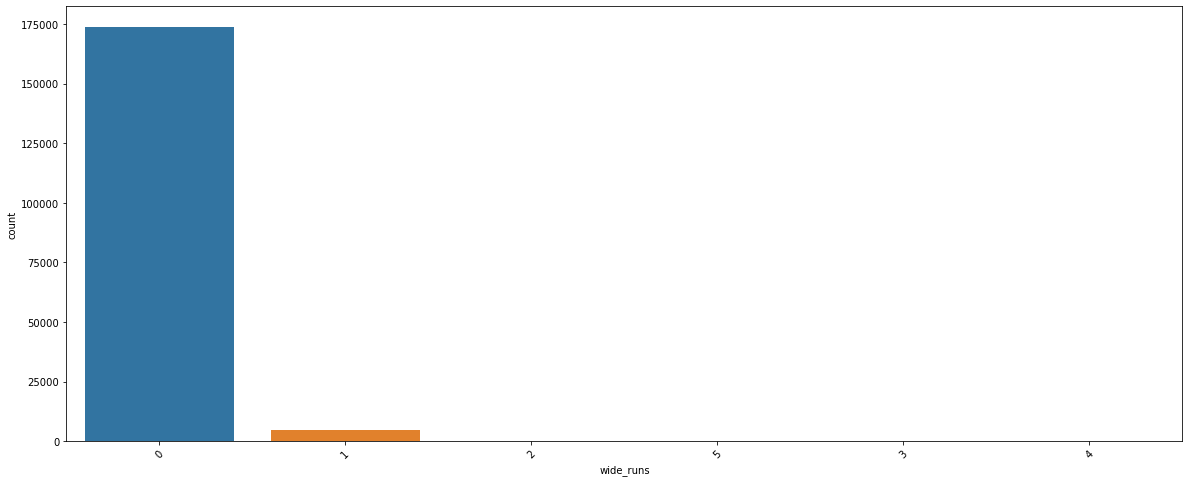

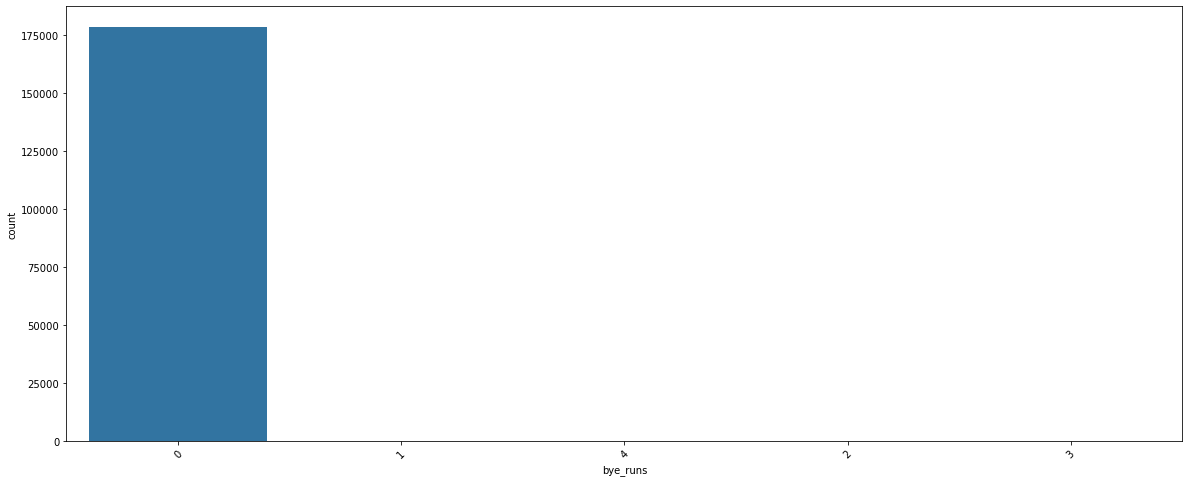

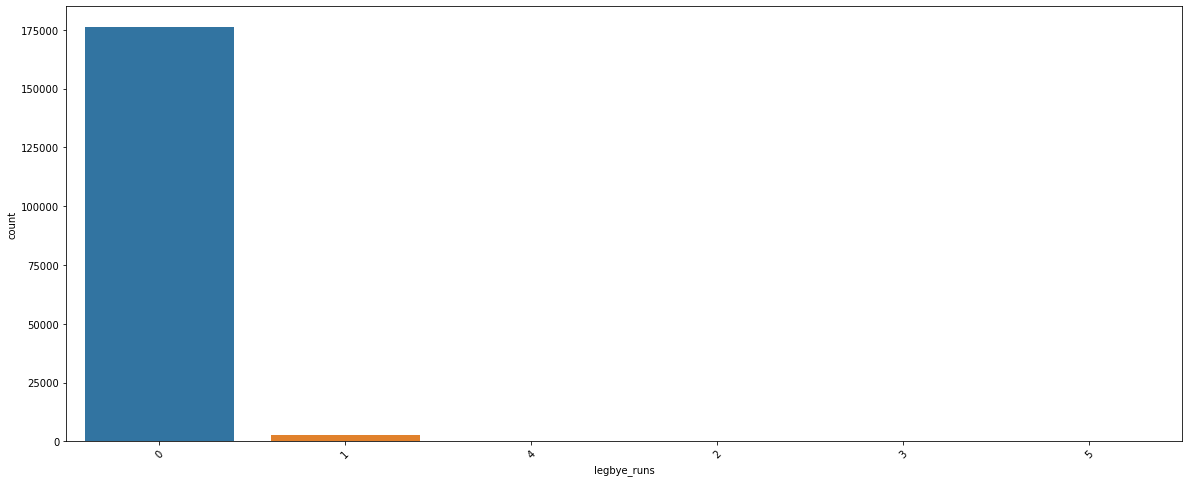

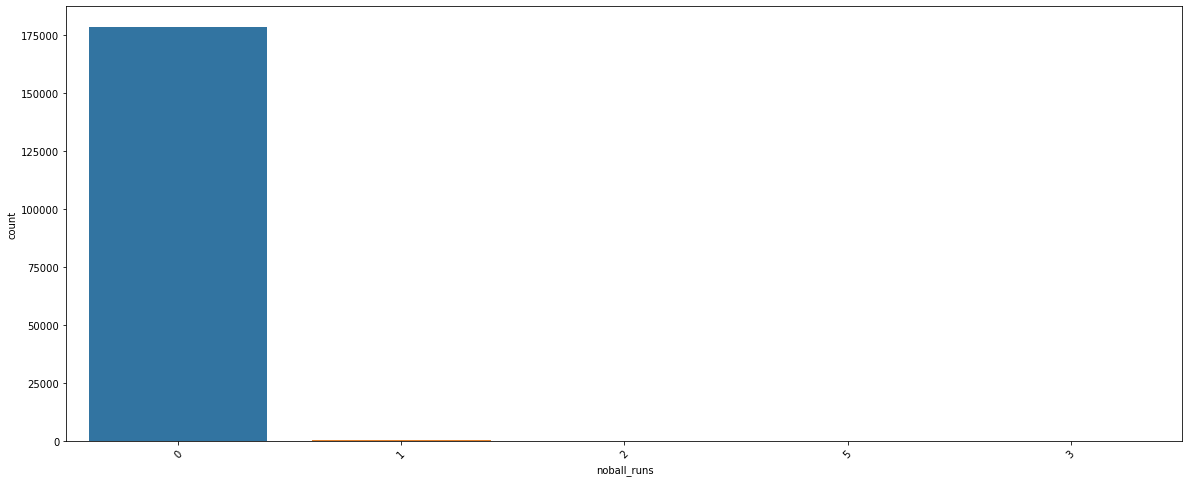

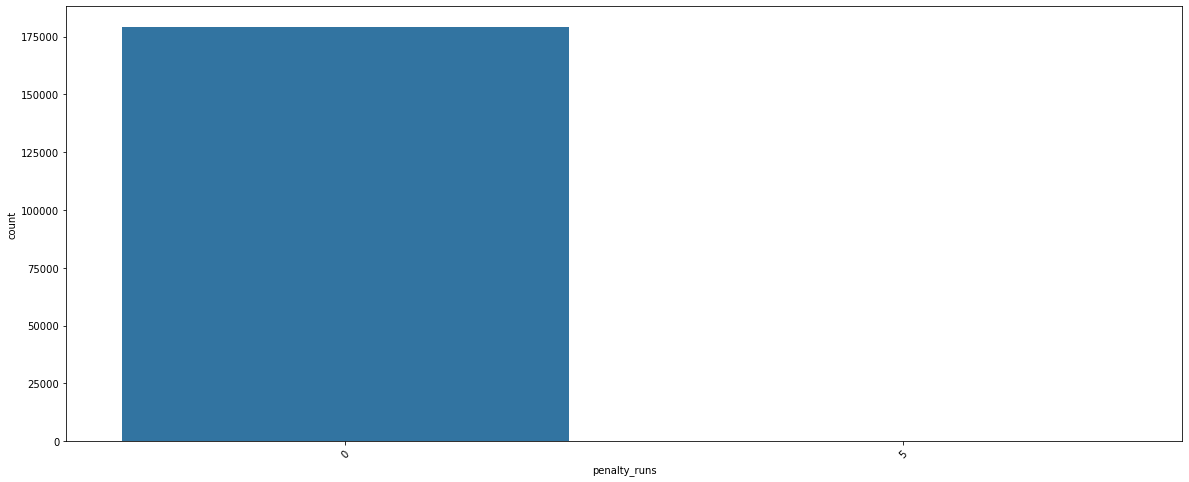

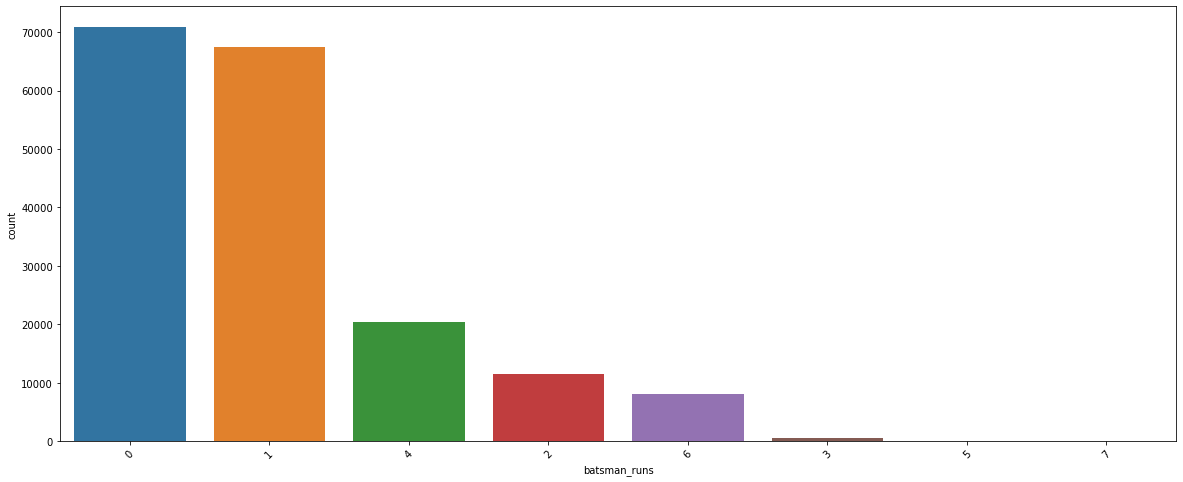

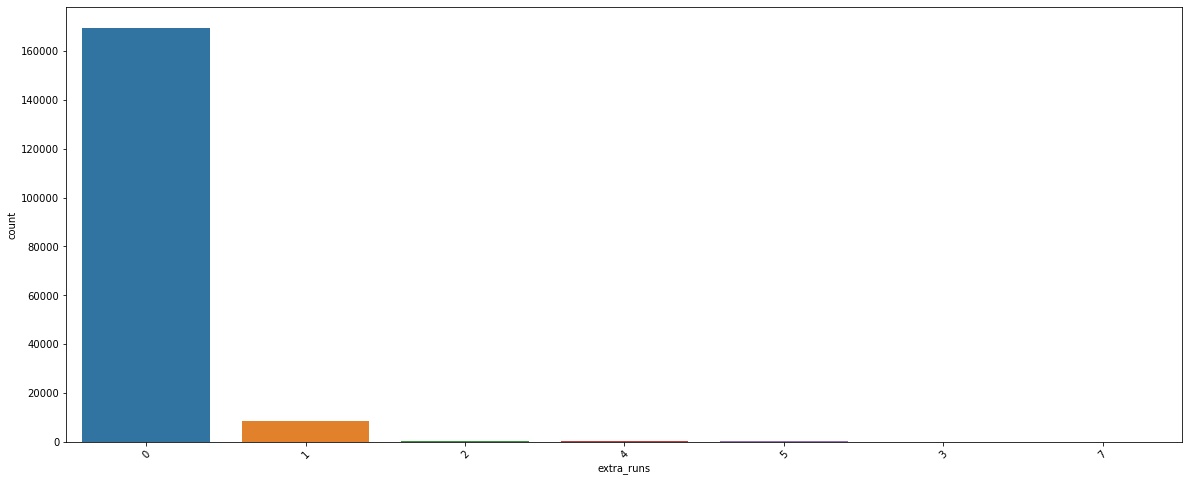

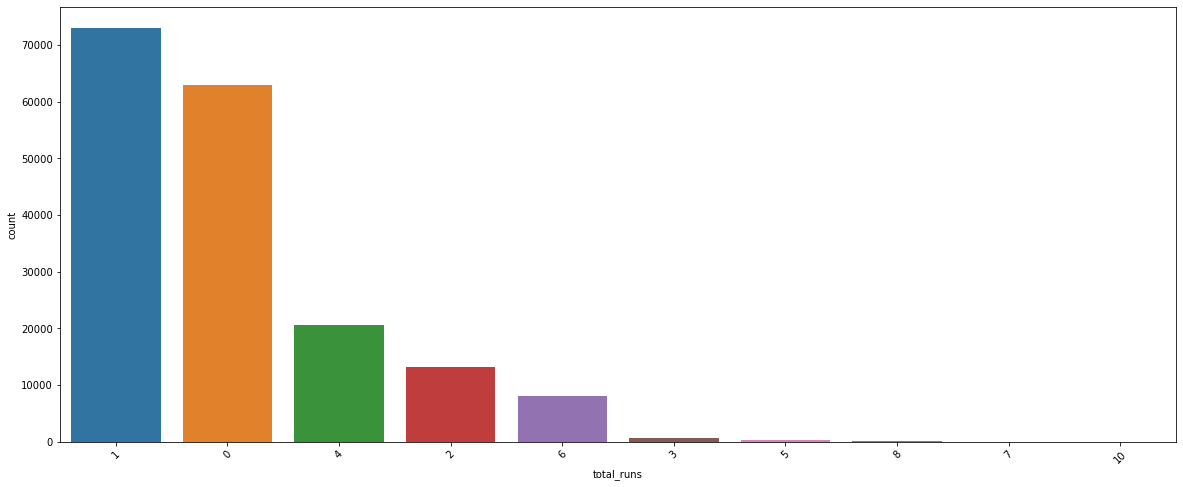

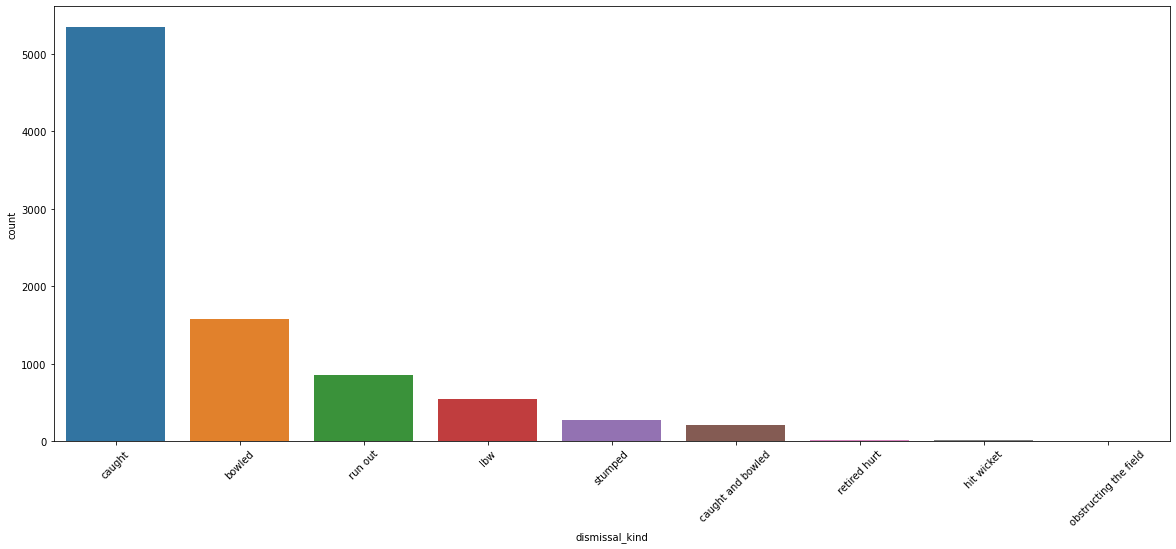

In [10]:
# Observing Countplots for dataframe -'deliveries'
cols = deliveries.columns
for i in cols:
    if deliveries[i].nunique() <45:
        plt.figure(figsize =(20,8))
        ax = sns.countplot(deliveries[i], order = deliveries[i].value_counts().index)
        if deliveries[i].nunique() >35:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=45)
        plt.show()

#### Name of the IPL Teams
 - Royal Challengers Bangalore(RCB)
 - Mumbai Indians Players(MI)
 - Chennai Super Kings(CSK)
 - Delhi Capitals Players(DC)
 - Kings XI Punjab Players(KXIP)
 - Kolkata Knight Riders(KKR)
 - Rajasthan Royals(RR)
 - Sunrisers Hyderabad Players(SRH)

In [11]:
# Correcting names of the teams & stadiums that are misspelled
matches.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
matches.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace = True)
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace = True)
matches.replace('Bangalore','Bengaluru',inplace = True)
matches.replace('Feroz Shah Kotla Ground','Feroz Shah Kotla',inplace = True)
matches.replace('M Chinnaswamy Stadium','M. Chinnaswamy Stadium',inplace = True)
matches.replace('M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk',inplace = True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace = True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali',inplace = True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace = True)
matches.replace('IS Bindra Stadium','Punjab Cricket Association Stadium',inplace = True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi Intl. Cricket Stadium',inplace = True)

deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
deliveries.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace = True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace = True)

In [12]:
##Replacing the name of the teams with their aliases
matches.replace({'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Capitals':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Kochi Tuskers Kerala':'KTK',
       'Pune Warriors':'PW'},inplace = True)

deliveries.replace({'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Capitals':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Kochi Tuskers Kerala':'KTK',
       'Pune Warriors':'PW'},inplace = True)

In [13]:
#correcting names of the players
# 1. C Ingram and CA Ingram are same players
# 2. RG Sharma and R Sharma are same players
# 3. GH Vihari and G Vihari are same players
# 4. NS Naik and N Naik are same players
deliveries.replace({'C Ingram':'CA Ingram','NS Naik':'N Naik','GH Vihari':'H Vihari','LH Ferguson':'L Ferguson','S Sharma':'Sandeep Sharma'}, inplace = True)

In [14]:
#checking missing percentage in dataframe - 'matches'
((matches.isnull().sum()/len(matches.id))*100).sort_values(ascending=False)

umpire3            84.259259
city                0.925926
player_of_match     0.529101
winner              0.529101
umpire1             0.264550
umpire2             0.264550
toss_winner         0.000000
season              0.000000
date                0.000000
team1               0.000000
team2               0.000000
result              0.000000
toss_decision       0.000000
dl_applied          0.000000
win_by_runs         0.000000
win_by_wickets      0.000000
venue               0.000000
id                  0.000000
dtype: float64

In [15]:
# Dropping umpire3 column since it has lot of missing values
matches.drop('umpire3',1,inplace=True)

In [16]:
#The Matches held in Dubai International Cricket Stadium are having city as NAN, replacing those with Dubai.
# UAE is the country and Dubai is the City
matches.city.fillna("Dubai",inplace = True)

In [17]:
matches[matches.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,DC,PW,DC,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bengaluru,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bengaluru,2015-05-17,DC,RCB,RCB,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [18]:
#Dropping those rows where winner is Null we have observed that there was no results for those matches,hence we choose to drop those
matches = matches[~matches.winner.isnull()]
matches.shape

(752, 17)

For categorical columns, most suited soltuion to deal with the missing values is to replace them with the most frequently occurring categorical value. This means that we can replace the missing values in umpire1 & umpire 2 columns by mode.

In [19]:
cat_col = ['umpire1','umpire2']
for cols in cat_col:
    matches[cols].fillna(matches[cols].mode()[0], inplace=True)

In [20]:
# Rechecking missing in the dataframe-'matches'
matches.isnull().values.any()

False

#### Let us now observe missing values in the dataframe - 'deliveries'

In [21]:
#checking missing percentage in dataframe - 'deliveries'
((deliveries.isnull().sum()/len(deliveries.match_id))*100).sort_values(ascending=False)

fielder             96.399334
player_dismissed    95.066954
dismissal_kind      95.066954
bowler               0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
wide_runs            0.000000
is_super_over        0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
match_id             0.000000
dtype: float64

In [22]:
# Replacing the missing values by NA
miss_col = ['player_dismissed','dismissal_kind', 'fielder']

for col in miss_col:
    deliveries[col].fillna("NA",inplace = True)  


In [23]:
# Rechecking missing in the dataframe-'deliveries'
deliveries.isnull().values.any()

False

In [24]:
matches['date'] = pd.to_datetime(matches['date'])

In [25]:
#Extracting the month from the date
matches['Month'] = matches['date'].dt.strftime('%B')

In [26]:
#Extracting Day Name from the date
matches['day'] = matches['date'].dt.strftime('%A')

In [27]:
#Dropping the Date column
matches.drop('date',axis =1, inplace = True)

## All time Batting Leaders

In [28]:
player_stats = pd.DataFrame()
batting_df = deliveries.copy()
batting_df.rename(columns = {'batsman':'player'},inplace = True)

#finding list of players
bowler = list(batting_df.bowler.unique())
batsman = list(batting_df.player.unique())
fielder = list(batting_df.fielder.unique())
player = list(set(bowler + batsman+fielder))
len(player)

607

In [29]:
batting_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA


In [30]:
#Adding Players to the DataFrame
player_stats = pd.DataFrame(data =player, columns =["player"])
player_stats.head()

,player
0,I Sodhi
1,AR Bawne
2,CK Langeveldt
3,R Dravid
4,UT Khawaja


## 1. Maximum Number of Runs

In [31]:
temp_df  = batting_df.groupby('player')['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending = False)
temp_df.rename(columns = {'batsman_runs':'Total Runs'},inplace = True)
temp_df.head()

,player,Total Runs
482,V Kohli,5434
424,SK Raina,5415
364,RG Sharma,4914
111,DA Warner,4741
389,S Dhawan,4632


In [32]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs
0,I Sodhi,10.0
1,AR Bawne,12.0
2,CK Langeveldt,8.0
3,R Dravid,2174.0
4,UT Khawaja,127.0


## 2. Maximum Number of Sixes

In [33]:
#Creating Dummies for player runs to count the sixes
dummy = pd.get_dummies(batting_df['batsman_runs'],drop_first = True)
batting_df = pd.concat([batting_df, dummy],axis =1)

In [34]:
temp_df = batting_df.groupby(['player'])[6].sum().reset_index()
temp_df.rename(columns ={6:'Most Sixes'},inplace = True)

In [35]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes
0,I Sodhi,10.0,0.0
1,AR Bawne,12.0,0.0
2,CK Langeveldt,8.0,1.0
3,R Dravid,2174.0,28.0
4,UT Khawaja,127.0,3.0


## 3. Most Fours

In [36]:
temp_df = batting_df.groupby(['player'])[4].sum().reset_index()
temp_df.rename(columns ={4:'Most Fours'},inplace = True)

In [37]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours
0,I Sodhi,10.0,0.0,0.0
1,AR Bawne,12.0,0.0,1.0
2,CK Langeveldt,8.0,1.0,0.0
3,R Dravid,2174.0,28.0,269.0
4,UT Khawaja,127.0,3.0,14.0


## 4. Highest Score

In [38]:
#Grouping the dataframe by match_id and player 
batting_df['Highest Score Is_out'] = batting_df['dismissal_kind'].apply(lambda x: 0 if x=='NA' else 1)
temp_df = batting_df.groupby(['match_id','inning','player','bowling_team'])['batsman_runs','Highest Score Is_out'].sum().reset_index()
#dropping match id
temp_df.drop(['match_id','inning'],axis=1,inplace = True)
#Extracting highest score for each player 
temp_df = temp_df.groupby(['player','Highest Score Is_out','bowling_team'])['batsman_runs'].max().reset_index()
#Dropping Duplicates
temp_df = temp_df.drop_duplicates(subset =['player'],keep='first')
#Renaming the columns to apprpriate name
temp_df.rename(columns ={'batsman_runs':'Highest Score','bowling_team':'Highest Score Opponent'},inplace = True)
#Rearranging the columns
temp_df = temp_df[['player','Highest Score','Highest Score Opponent','Highest Score Is_out']]
temp_df.head()

,player,Highest Score,Highest Score Opponent,Highest Score Is_out
0,A Ashish Reddy,36,CSK,0
12,A Chandila,4,RCB,0
14,A Chopra,1,MI,0
19,A Choudhary,15,GL,0
22,A Dananjaya,4,DC,0


In [39]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0


## 5. Batting Strike Rate

In [40]:
#Function to Map the columns to binary values
def arg(x):
    if x != 0:
        return 1
    else:
        return 0

In [41]:
#Extracting ball_cnt column from ball, this will help to calculate number of balls faced by each player
batting_df['Balls Faced'] = batting_df['ball'].apply(arg)
temp_df = batting_df.groupby('player')[['Balls Faced','batsman_runs']].sum().reset_index()
temp_df['Batting Strike Rate'] = round(temp_df['batsman_runs']*100/temp_df['Balls Faced'], 2)

#Dropping the player_runs  from temp_df
temp_df.drop('batsman_runs',axis =1,inplace= True)

#Rearranging the columns
temp_df = temp_df[['player','Batting Strike Rate','Balls Faced']]
temp_df.head()

,player,Batting Strike Rate,Balls Faced
0,A Ashish Reddy,142.86,196
1,A Chandila,57.14,7
2,A Chopra,70.67,75
3,A Choudhary,125.00,20
4,A Dananjaya,80.00,5


In [42]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0


## 6. Best Batting Average

In [43]:
#Calculating how many times the players got out
temp_df = batting_df.groupby(['player'])['Highest Score Is_out'].sum().reset_index()
temp_df.rename(columns = {'Highest Score Is_out':'Dismissal Count'},inplace = True)
temp_df.head()

,player,Dismissal Count
0,A Ashish Reddy,15
1,A Chandila,1
2,A Chopra,5
3,A Choudhary,2
4,A Dananjaya,0


In [44]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0


In [45]:
#Calculating the Batting Average
player_stats['Best Batting Average'] = round(player_stats['Total Runs']/player_stats['Dismissal Count'],2)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40


## 7. Most Centuries

In [46]:
#finding the number of centuries
temp_df = batting_df.groupby(['match_id','inning','player'])['batsman_runs'].sum().reset_index()
temp_df['Most Centuries'] = np.where(temp_df['batsman_runs'] >=100,1,0)

# #Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)
#grouping the dataset on relevant columns to find the number of centuries
temp_df = temp_df.groupby(['player'])['Most Centuries'].sum().reset_index()
temp_df.head()

,player,Most Centuries
0,A Ashish Reddy,0
1,A Chandila,0
2,A Chopra,0
3,A Choudhary,0
4,A Dananjaya,0


In [47]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0


## 8. Most Fifties

In [48]:
#finding the number of fifties
temp_df = batting_df.groupby(['match_id','inning','player'])['batsman_runs'].sum().reset_index()
temp_df['Most Fifties'] = np.where((temp_df['batsman_runs'] >=50) & (temp_df['batsman_runs'] <100)  ,1,0)

# #Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)
#grouping the dataset on relevant columns to find the number of fifties
temp_df = temp_df.groupby(['player'])['Most Fifties'].sum().reset_index()
temp_df.head()

,player,Most Fifties
0,A Ashish Reddy,0
1,A Chandila,0
2,A Chopra,0
3,A Choudhary,0
4,A Dananjaya,0


In [49]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0


## 9. Most Dots Played

In [50]:
#finding the number of dots
temp_df = batting_df.groupby(['match_id','inning','player'])['batsman_runs'].sum().reset_index()
temp_df['Most Dots Played'] = np.where((temp_df['batsman_runs']==0) ,1,0)

# #Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)
#grouping the dataset on relevant columns to find the number of dots
temp_df = temp_df.groupby(['player'])['Most Dots Played'].sum().reset_index()
temp_df.head()

,player,Most Dots Played
0,A Ashish Reddy,0
1,A Chandila,1
2,A Chopra,0
3,A Choudhary,0
4,A Dananjaya,0


In [51]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0


## 10. Most Ducks

In [52]:
#finding the number of dots
temp_df = batting_df.groupby(['match_id','inning','player','dismissal_kind'])['batsman_runs'].sum().reset_index()

#filtering those rows where player was not out
temp_df = temp_df[temp_df['dismissal_kind'] !='NA']
# temp_df['Most Dots Played'] = np.where((temp_df['batsman_runs']==0) ,1,0)

#Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)

#filtering those rows where batsman runs are greater than 0
temp_df = temp_df[temp_df['batsman_runs']==0]

#renaming the batsman_runs to relevant name as "Most Ducks"
temp_df.rename(columns = {'batsman_runs':'Most Ducks'},inplace = True)

#grouping the dataset on relevant columns to find the number of Ducks
temp_df = temp_df.groupby(['player'])['Most Ducks'].count().reset_index()
temp_df.head()

,player,Most Ducks
0,A Ashish Reddy,14
1,A Chandila,1
2,A Chopra,5
3,A Choudhary,2
4,A Flintoff,2


In [53]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0


## 10. Batting Consistency

In [54]:
#Calculating the number of innings played by each player
batting_df['inning_cnt'] = batting_df['inning'].apply(arg)
temp_df = batting_df.groupby(['match_id','player'])['inning_cnt'].max().reset_index()
temp_df.rename(columns = {'inning_cnt':'Innings Batted'},inplace = True)

#Dropping irrelevant columns
temp_df.drop('match_id',axis =1, inplace = True)

#Grouping data based on players name to calculate the number of innings they batted
temp_df = temp_df.groupby('player')['Innings Batted'].sum().reset_index()
temp_df.head()

,player,Innings Batted
0,A Ashish Reddy,23
1,A Chandila,2
2,A Chopra,6
3,A Choudhary,3
4,A Dananjaya,1


In [55]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0


In [56]:
#Calculating the Consistency of each player
player_stats['Batting Consistency'] =round((0.4262 * player_stats['Best Batting Average'] + 0.2566 * player_stats['Innings Batted'] + 0.1510 * player_stats['Batting Strike Rate'] + 0.0787 * player_stats['Most Centuries'] + 0.00556 * player_stats['Most Fifties'] - 0.0328 * player_stats['Most Ducks']),2)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50


## 11. Fastest Century

In [57]:
#finding the number of centuries
temp_df = batting_df.groupby(['match_id','inning','player','bowling_team'])['batsman_runs','Balls Faced'].sum().reset_index()
temp_df['Most Centuries'] = np.where(((temp_df['batsman_runs']>=100)),1,0)

# #Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)
temp_df = temp_df[temp_df['Most Centuries'] >0] 

#grouping the dataset on relevant columns to find the least number of balls taken to score century
temp_df = temp_df.groupby(['player','Most Centuries','bowling_team'])['Balls Faced'].min().reset_index()
temp_df = temp_df.sort_values(by='Balls Faced')

#Dropping duplicates
temp_df = temp_df.drop_duplicates(subset =['player'], keep='first')

#Dropping Most Fifties columns
temp_df.drop('Most Centuries',axis =1, inplace = True)
temp_df.rename(columns = {'Balls Faced':'Fastest Century','bowling_team':'Fastest Century Opponent'},inplace = True)

#Rearranging the columns
temp_df = temp_df[['player','Fastest Century','Fastest Century Opponent']]
temp_df.head()

,player,Fastest Century,Fastest Century Opponent
18,DA Miller,39,RCB
58,YK Pathan,40,MI
14,CH Gayle,49,KXIP
4,AC Gilchrist,50,MI
53,V Kohli,51,KXIP


In [58]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing NA with zero values
player_stats['Fastest Century'].fillna(0,inplace =True)
#Changing Fastest Century to appropriate Datatype 
player_stats['Fastest Century'] = player_stats['Fastest Century'].astype('int')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0


## 12. Fastest Fifty

In [59]:
#finding the number of fifties
temp_df = batting_df.groupby(['match_id','inning','player','bowling_team'])['batsman_runs','Balls Faced'].sum().reset_index()
temp_df['Most Fifties'] = np.where(((temp_df['batsman_runs']>=50) &(temp_df['batsman_runs'] <100)),1,0)

# #Dropping irrelevant columns
temp_df.drop(['match_id','inning'],axis =1,inplace = True)
temp_df = temp_df[temp_df['Most Fifties'] >0] 

#grouping the dataset on relevant columns to find the least number of balls taken to score century
temp_df = temp_df.groupby(['player','Most Fifties','bowling_team'])['Balls Faced'].min().reset_index()
temp_df = temp_df.sort_values(by='Balls Faced')

#Dropping duplicates
temp_df = temp_df.drop_duplicates(subset =['player'], keep='first')

#Dropping Most Fifties columns
temp_df.drop('Most Fifties',axis =1, inplace = True)
temp_df.rename(columns = {'Balls Faced':'Fastest Fifty','bowling_team':'Fastest Fifty Opponent'},inplace = True)

#Rearranging the columns
temp_df = temp_df[['player','Fastest Fifty','Fastest Fifty Opponent']]
temp_df.head()

,player,Fastest Fifty,Fastest Fifty Opponent
268,KL Rahul,16,DC
29,AD Russell,16,RCB
500,SP Narine,19,RCB
239,KA Pollard,20,KKR
355,MS Dhoni,20,MI


In [60]:
#Merging with original Dataset
player_stats = pd.merge(player_stats,temp_df, on=['player'],how ='left')
#Replacing NA with zero values
player_stats['Fastest Fifty'].fillna(0,inplace =True)
#Changing Fastest Fifity to appropriate Datatype 
player_stats['Fastest Fifty'] = player_stats['Fastest Fifty'].astype('int')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0


## 13. Best PartnerShip

In [61]:
#finding the partnership
best_partnership = batting_df.groupby(['match_id','inning','player','non_striker','bowling_team'])['total_runs'].sum().reset_index()
#dropping irrelevant columns
best_partnership.drop(['match_id','inning'],axis=1,inplace = True)

#Sorintg the dataframe on basis of total runs
best_partnership = best_partnership.sort_values(by='total_runs',ascending = False)

# Dropping the duplicates
best_partnership = best_partnership.drop_duplicates(subset=['player','non_striker'], keep='first')

best_partnership.head()

,player,non_striker,bowling_team,total_runs
14035,AB de Villiers,V Kohli,MI,138
10323,CH Gayle,TM Dilshan,PW,130
9300,CH Gayle,V Kohli,DC,128
7443,AC Gilchrist,SE Marsh,RCB,126
8338,DA Warner,NV Ojha,SRH,119


In [62]:
def partnership_sort(x):
    list1 = x.split('Vs')
    list1.sort()
    return ' Vs '.join(list1)

In [63]:
#Creating a partnership column by joining player and nonstriker
best_partnership['Partnership'] = best_partnership['player'] + 'Vs'+best_partnership['non_striker']

#Sorting partnership columns to remove duplicates 
best_partnership['Partnership'] = best_partnership['Partnership'].apply(partnership_sort)

#Sorintg the dataframe on basis of total runs
best_partnership = best_partnership.sort_values(by='total_runs',ascending = False)

# #Dropping duplicates
# best_partnership = best_partnership.drop_duplicates(subset =['Partnership'],keep='first')
#Keeping relevant columns
best_partnership.head()

,player,non_striker,bowling_team,total_runs,Partnership
14035,AB de Villiers,V Kohli,MI,138,AB de Villiers Vs V Kohli
10323,CH Gayle,TM Dilshan,PW,130,CH Gayle Vs TM Dilshan
9300,CH Gayle,V Kohli,DC,128,CH Gayle Vs V Kohli
7443,AC Gilchrist,SE Marsh,RCB,126,AC Gilchrist Vs SE Marsh
8338,DA Warner,NV Ojha,SRH,119,DA Warner Vs NV Ojha


## 14. Highest Partnership

In [64]:
temp_df = pd.melt(best_partnership,id_vars = ['bowling_team','total_runs','Partnership'], value_name = 'Players')

#Dropping irrelevant columns
temp_df.drop('variable', axis =1,inplace = True)

#Renaming the columns
temp_df.rename(columns ={'bowling_team':'Best Partnership Team','total_runs':'Best Partnership Runs','Players':'player','Partnership':'Best Partnership'},inplace = True)

#Sorintg the dataframe on basis of total runs
temp_df = temp_df.sort_values(by='Best Partnership Runs',ascending = False)

#Dropping Duplicates and keeping only highest value
temp_df = temp_df.drop_duplicates(subset='player',keep = 'first')
temp_df.head()

,Best Partnership Team,Best Partnership Runs,Best Partnership,player
0,MI,138,AB de Villiers Vs V Kohli,AB de Villiers
6509,MI,138,AB de Villiers Vs V Kohli,V Kohli
6510,PW,130,CH Gayle Vs TM Dilshan,TM Dilshan
1,PW,130,CH Gayle Vs TM Dilshan,CH Gayle
6512,RCB,126,AC Gilchrist Vs SE Marsh,SE Marsh


In [65]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes or "-"
player_stats['Best Partnership Team'].fillna('-',inplace = True)
player_stats['Best Partnership'].fillna(0,inplace = True)
player_stats['Best Partnership Runs'].fillna(0,inplace = True)             
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja


## 15. Number of Not outs

In [66]:
#Extracting not out feature from Is_out
player_stats['Not Out Innings'] = player_stats['Innings Batted'] - player_stats['Dismissal Count']
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0


## 16. Most 1's

In [67]:
#Extracting the count of most 1s scored by player
temp_df = batting_df.groupby(['player'])[1].sum().reset_index()
#Renaming the column
temp_df.rename(columns ={1:'Most 1s'},inplace = True)
temp_df.head()

,player,Most 1s
0,A Ashish Reddy,83.0
1,A Chandila,4.0
2,A Chopra,21.0
3,A Choudhary,13.0
4,A Dananjaya,2.0


In [68]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0


## 17. Most 2's

In [69]:
#Extracting the count of most 1s scored by player
temp_df = batting_df.groupby(['player'])[2].sum().reset_index()
#Renaming the column
temp_df.rename(columns ={2:'Most 2s'},inplace = True)
temp_df.head()

,player,Most 2s
0,A Ashish Reddy,20.0
1,A Chandila,0.0
2,A Chopra,2.0
3,A Choudhary,1.0
4,A Dananjaya,1.0


In [70]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0


## 18. Most 3's

In [71]:
#Extracting the count of most 1s scored by player
temp_df = batting_df.groupby(['player'])[3].count().reset_index()
#Renaming the column
temp_df.rename(columns ={3:'Most 3s'},inplace = True)
temp_df.head()

,player,Most 3s
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5


In [72]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0


## 19. Overall Player Performance Batting(OPP)

In [73]:
player_stats['OPP Batting'] = (((player_stats['Total Runs'])/(player_stats['Balls Faced'])) +\
                                 (player_stats['Most Sixes']*6) + (player_stats['Most Fours']*4) -\
                                 (player_stats['Most 1s'] + player_stats['Most 2s']*2 + player_stats['Most 3s']*3))/(player_stats['Balls Faced'])
#Normalizing the performance 
player_stats['OPP Batting'] = round((player_stats['OPP Batting'] - min(player_stats['OPP Batting']))/(max(player_stats['OPP Batting']) - min(player_stats['OPP Batting'])),2)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30


## 20. Dismissal Types

In [74]:
#Creating dummies for dismissal Kind
dummy = pd.get_dummies(batting_df['dismissal_kind'],drop_first=True,prefix  ="Dismissal_kind")
#Concatenating with the overall dataframe
batting_df = pd.concat([batting_df,dummy],axis =1)
batting_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [75]:
#Grouping the out types for each player
out_types =['Dismissal_kind_bowled','Dismissal_kind_caught','Dismissal_kind_caught and bowled','Dismissal_kind_hit wicket','Dismissal_kind_lbw','Dismissal_kind_obstructing the field','Dismissal_kind_retired hurt','Dismissal_kind_run out','Dismissal_kind_stumped']
temp_df = batting_df.groupby(['player'])[out_types].sum().reset_index()
temp_df.head()

,player,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped
0,A Ashish Reddy,5,8,0,0,0,0,0,2,0
1,A Chandila,0,0,0,0,0,0,0,1,0
2,A Chopra,0,2,0,0,1,0,0,1,1
3,A Choudhary,0,1,0,0,0,0,0,1,0
4,A Dananjaya,0,0,0,0,0,0,0,0,0


In [76]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## 21. Most Catches/Stumped 

In [77]:
#filtering the relevant columns
fielders = batting_df[~((batting_df.fielder =='NA') & (batting_df.dismissal_kind =='NA'))][['bowler','fielder','dismissal_kind']]
fielders.head()

,bowler,fielder,dismissal_kind
11,A Choudhary,Mandeep Singh,caught
64,STR Binny,Sachin Baby,caught
94,YS Chahal,Sachin Baby,caught
116,TS Mills,NA,bowled
160,Rashid Khan,NA,bowled


In [78]:
#Since for caught and bowled the fielder name is NA, replacing fielder name for caught and bowled as bowler name
temp_df = fielders.iloc[np.where(fielders.fielder =='NA')][['fielder','bowler','dismissal_kind']] 
temp_df['fielder']= temp_df.iloc[np.where(temp_df.fielder =='NA')]['bowler']
temp_df = temp_df.iloc[np.where(temp_df.fielder !='NA')]
fielders = pd.concat([temp_df,fielders], axis =0)
fielders.drop('bowler', axis =1,inplace = True)
fielders.head()

,fielder,dismissal_kind
116,TS Mills,bowled
160,Rashid Khan,bowled
235,A Nehra,bowled
274,Imran Tahir,bowled
287,Imran Tahir,bowled


In [79]:
#craeting dummy for dismissal_kind
dummy = pd.get_dummies(fielders.dismissal_kind,prefix = "Number_of")
fielders = pd.concat([fielders,dummy],axis =1)
fielders.drop('dismissal_kind', axis =1, inplace = True)
fielders.head()

,fielder,Number_of_bowled,Number_of_caught,Number_of_caught and bowled,Number_of_hit wicket,Number_of_lbw,Number_of_obstructing the field,Number_of_retired hurt,Number_of_run out,Number_of_stumped
116,TS Mills,1,0,0,0,0,0,0,0,0
160,Rashid Khan,1,0,0,0,0,0,0,0,0
235,A Nehra,1,0,0,0,0,0,0,0,0
274,Imran Tahir,1,0,0,0,0,0,0,0,0
287,Imran Tahir,1,0,0,0,0,0,0,0,0


In [80]:
#Since in fielders name some players have suffix as sub, removing them before grouping
fielders['sub1'] = fielders.fielder.apply(lambda x:''.join(x.split("(sub)")).strip())
fielders.drop('fielder',axis =1,inplace = True)
fielders.rename(columns ={'sub1':'players'},inplace =True)
fielders.head()

,Number_of_bowled,Number_of_caught,Number_of_caught and bowled,Number_of_hit wicket,Number_of_lbw,Number_of_obstructing the field,Number_of_retired hurt,Number_of_run out,Number_of_stumped,players
116,1,0,0,0,0,0,0,0,0,TS Mills
160,1,0,0,0,0,0,0,0,0,Rashid Khan
235,1,0,0,0,0,0,0,0,0,A Nehra
274,1,0,0,0,0,0,0,0,0,Imran Tahir
287,1,0,0,0,0,0,0,0,0,Imran Tahir


In [81]:
#grouping the dataframe on basis of fielder name and taking relevant columns
dismissals = ['Number_of_bowled','Number_of_caught','Number_of_caught and bowled','Number_of_lbw','Number_of_run out','Number_of_stumped']
fielders = fielders.groupby(['players'])[dismissals].sum().reset_index()
fielders.head()

,players,Number_of_bowled,Number_of_caught,Number_of_caught and bowled,Number_of_lbw,Number_of_run out,Number_of_stumped
0,A Ashish Reddy,6.0,8.0,1.0,3.0,2.0,0.0
1,A Chandila,0.0,2.0,5.0,0.0,0.0,0.0
2,A Chopra,0.0,2.0,0.0,0.0,1.0,0.0
3,A Flintoff,0.0,3.0,1.0,0.0,0.0,0.0
4,A Hales,0.0,2.0,0.0,0.0,0.0,0.0


In [82]:
#Tagging each player as "player","Bowler" and "wicket-keeper"
#In this section we are avoiding All rounder tagging as of now, this we will update while calculating bowling stats

fielders['Player Role'] = np.where(fielders["Number_of_caught and bowled"] >=1,"Bowler",(np.where(fielders['Number_of_stumped']>=1,"Wicket-Keeper",(np.where(fielders['Number_of_bowled']>=1,"Bowler",(np.where(fielders['Number_of_lbw']>=1,"Bowler","Batsman")))))))

#grouping "caught" and "caught and bowled" as caught
fielders['Number_of_caught'] = fielders['Number_of_caught'] + fielders['Number_of_caught and bowled']

# #dropping "caught and bowled" as we have clubbed this under caught
fielders.drop("Number_of_caught and bowled", axis =1,inplace = True)

#Renaming caught to catches
fielders.rename(columns ={'Number_of_caught':'Number_of_catches'},inplace = True)

fielders.head()

,players,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role
0,A Ashish Reddy,6.0,9.0,3.0,2.0,0.0,Bowler
1,A Chandila,0.0,7.0,0.0,0.0,0.0,Bowler
2,A Chopra,0.0,2.0,0.0,1.0,0.0,Batsman
3,A Flintoff,0.0,4.0,0.0,0.0,0.0,Bowler
4,A Hales,0.0,2.0,0.0,0.0,0.0,Batsman


In [83]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,fielders, left_on =['player'],right_on = ['players'],how ='left')
player_stats.drop("players",axis =1,inplace = True)
player_stats = player_stats.iloc[np.where(~player_stats.player.isna())]
player_stats['Player Role'].fillna('-',inplace = True)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman


In [84]:
#Changing player types to All Rounder for those players who have player type as bowler and have batted more than 100 balls
temp_df = player_stats.iloc[np.where((player_stats['Balls Faced']>100) & ((player_stats['Player Role'] =='Bowler')|(player_stats['Player Role'] =='-')))]

#deleting the rows which are extracted in temp_df
player_stats = player_stats.iloc[np.where(~((player_stats['Balls Faced']>100) & ((player_stats['Player Role'] =='Bowler')|(player_stats['Player Role'] =='-'))))]

#replacing player type in temp_df to all rounders
temp_df['Player Role'] = 'All Rounder'
temp_df.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role
12,PC Valthaty,505.0,20.0,61.0,120.0,CSK,0.0,116.90,432.0,22.0,22.95,1.0,2.0,1.0,22.0,23.0,32.70,64,CSK,49,SRH,SRH,68.0,AC Gilchrist Vs PC Valthaty,1.0,101.0,20.0,432.0,0.37,3.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,All Rounder
21,DR Smith,2385.0,117.0,245.0,24.0,CSK,0.0,132.28,1803.0,81.0,29.44,0.0,17.0,8.0,81.0,88.0,52.54,0,0,28,RR,RR,94.0,DR Smith Vs SR Tendulkar,7.0,521.0,84.0,1803.0,0.38,18.0,48.0,1.0,0.0,12.0,0.0,0.0,2.0,0.0,8.0,41.0,2.0,2.0,0.0,All Rounder
25,PP Chawla,587.0,18.0,54.0,8.0,CSK,0.0,108.50,541.0,50.0,11.74,0.0,0.0,11.0,47.0,75.0,39.09,0,0,0,0,KKR,34.0,MS Gony Vs PP Chawla,25.0,192.0,34.0,541.0,0.27,12.0,26.0,0.0,0.0,2.0,0.0,0.0,8.0,2.0,43.0,40.0,16.0,7.0,0.0,All Rounder
28,KH Pandya,915.0,35.0,87.0,42.0,CSK,0.0,144.09,635.0,32.0,28.59,0.0,1.0,2.0,31.0,46.0,44.74,0,0,38,DC,DC,61.0,KH Pandya Vs MJ Guptill,14.0,239.0,53.0,635.0,0.32,2.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,19.0,2.0,1.0,0.0,All Rounder
29,AB McDonald,123.0,4.0,9.0,8.0,KXIP,0.0,119.42,103.0,5.0,24.60,0.0,0.0,1.0,5.0,9.0,30.66,0,0,0,0,RCB,28.0,AB McDonald Vs KM Jadhav,4.0,42.0,9.0,103.0,0.24,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,All Rounder


In [85]:
#concatenating the temp_df with batting_leader
player_stats = pd.concat([player_stats,temp_df], axis =0)

## 22. player Strike Rate in Powerplay 

In [86]:
#Extracting ball_cnt column from ball, this will help to calculate number of balls faced by each player
temp_df = batting_df[batting_df.over <=6]
temp_df = temp_df.groupby('player')[['Balls Faced','batsman_runs']].sum().reset_index()
temp_df['Powerplay Strike Rate'] = round(temp_df['batsman_runs']*100/temp_df['Balls Faced'], 2)

#Dropping the player_runs  from temp_df
temp_df.drop('batsman_runs',axis =1,inplace= True)

#Rearranging the columns
temp_df = temp_df[['player','Powerplay Strike Rate']]
temp_df.head()

,player,Powerplay Strike Rate
0,A Ashish Reddy,71.43
1,A Chopra,65.85
2,A Flintoff,93.33
3,A Hales,143.90
4,A Mishra,20.00


In [87]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44


## 23. Middle Over Strike Rate

In [88]:
#Extracting ball_cnt column from ball, this will help to calculate number of balls faced by each player
temp_df = batting_df[(batting_df.over>6) & (batting_df.over <15)]
temp_df = temp_df.groupby('player')[['Balls Faced','batsman_runs']].sum().reset_index()
temp_df['Middle Over Strike Rate'] = round(temp_df['batsman_runs']*100/temp_df['Balls Faced'], 2)

#Dropping the player_runs  from temp_df
temp_df.drop('batsman_runs',axis =1,inplace= True)

#Rearranging the columns
temp_df = temp_df[['player','Middle Over Strike Rate']]
temp_df.head()

,player,Middle Over Strike Rate
0,A Ashish Reddy,128.00
1,A Chopra,77.42
2,A Flintoff,85.00
3,A Hales,91.89
4,A Kumble,0.00


In [89]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92


## 24. Death Over Strike Rate

In [90]:
#Extracting ball_cnt column from ball, this will help to calculate number of balls faced by each player
temp_df = batting_df[batting_df.over >=15]
temp_df = temp_df.groupby('player')[['Balls Faced','batsman_runs']].sum().reset_index()
temp_df['Death Over Strike Rate'] = round(temp_df['batsman_runs']*100/temp_df['Balls Faced'], 2)

#Dropping the player_runs  from temp_df
temp_df.drop('batsman_runs',axis =1,inplace= True)

#Rearranging the columns
temp_df = temp_df[['player','Death Over Strike Rate']]
temp_df.head()

,player,Death Over Strike Rate
0,A Ashish Reddy,148.17
1,A Chandila,57.14
2,A Chopra,66.67
3,A Choudhary,125.00
4,A Dananjaya,80.00


In [91]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00


## 25. Best Ratio 
##### ((#no. of runs Scored through boundaries) - (#no. of runs scored through 1's,2's,3's))/(total number of runs)

In [92]:
player_stats['Best Ratio'] = ((player_stats['Most Sixes']*6+player_stats['Most Fours']*4) -
                                 (player_stats['Most 1s']*1 + player_stats['Most 2s']*2 + player_stats['Most 3s']*3))/player_stats['Total Runs']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339


## 26. Binning the Runs

In [93]:
batting_df['cum_batsman_runs'] = batting_df.groupby(['match_id','player'])['batsman_runs'].apply(lambda x:x.cumsum())
batting_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4


In [94]:
#calculating the number of runs scored by each batsman in each match
temp_df = batting_df.groupby(['match_id','inning','player','dismissal_kind'])['cum_batsman_runs'].max().reset_index()

#Dropping irrelevant columns
temp_df.drop('inning',axis =1, inplace = True)
temp_df.rename(columns = {'cum_batsman_runs':'match_batsman_runs'},inplace = True)
temp_df = temp_df.drop_duplicates(subset = ['match_id','player'], keep ='last')
temp_df.head()

,match_id,player,dismissal_kind,match_batsman_runs
0,1,BCJ Cutting,NA,16
2,1,DA Warner,caught,14
3,1,DJ Hooda,NA,16
5,1,MC Henriques,caught,52
7,1,S Dhawan,caught,40


In [95]:
#Creating Dynamic bins
def dynamic_bins():
    bins =[]
    bins = list(set((temp_df.match_batsman_runs//10)*10))
    bins.sort()
    bins.append(bins[-1] + 10)
    
    labels = []
    for i in bins:
        labels.append('('+str(i)+'-'+str(i+10)+'] Runs')
    return bins,labels

In [96]:
bins, labels = dynamic_bins()
labels =labels[:-1]
temp_df['bins'] = pd.cut(temp_df.match_batsman_runs,bins= bins,labels=labels,include_lowest=  True)

In [97]:
temp_df = temp_df.groupby(['player','bins']).size().reset_index()
temp_df.head()

,player,bins,0
0,A Ashish Reddy,(0-10] Runs,12
1,A Ashish Reddy,(10-20] Runs,8
2,A Ashish Reddy,(20-30] Runs,1
3,A Ashish Reddy,(30-40] Runs,2
4,A Ashish Reddy,(40-50] Runs,0


In [98]:
# Pivoting the temp_df dataframe
temp_df = temp_df.pivot(index='player', columns='bins', values=0)

#converting pivot table to normal dataframe
temp_df = pd.DataFrame(temp_df.to_records())
temp_df.head()

,player,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs
0,A Ashish Reddy,12,8,1,2,0,0,0,0,0,0,0,0,0,0,0,0
1,A Chandila,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A Chopra,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A Choudhary,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A Dananjaya,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#merging the dataset with the original dataset
player_stats = pd.merge(player_stats,temp_df, on =['player'],how ='left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 26. Batting Form

___This Parameter will be elgible for the players who played last year, if the player didnot played last year the form of those player will be considered as zero___.

In [100]:
#form is calculated only for last year
temp_df = matches[['id','season']]
#Dynamic calculation insted of hard coding
temp_df = temp_df[temp_df.season == temp_df.season.max()]
#Mergining with overall dataframe to extract the player name
temp_df = pd.merge(batting_df,temp_df, left_on =['match_id'], right_on =['id'], how ='inner')
temp_df = pd.DataFrame(list(temp_df['player'].unique()))
temp_df.rename(columns ={0:'player'},inplace = True)
temp_df.head()

,player
0,V Kohli
1,PA Patel
2,M Ali
3,AB de Villiers
4,S Hetmyer


In [101]:
#Calculating form for only those player who player last year 
temp_df = pd.merge(player_stats,temp_df, on =['player'],how ='inner')

In [102]:
temp_df['Batting Form'] = ((0.4262*temp_df['Best Batting Average'] + 0.2566*temp_df['Innings Batted'] + \
                  0.1510*temp_df['Batting Strike Rate'] + 0.0787*temp_df['Most Centuries'] + \
                  0.0556*temp_df['Most Fifties']) - (0.0328*temp_df['Most Ducks']))

#Extracting player and form from temporary dataframe and merging it with original dataframe
temp_df = temp_df[['player','Batting Form']]
temp_df.head()

,player,Batting Form
0,I Sodhi,10.968160
1,H Vihari,24.286440
2,Washington Sundar,29.829824
3,Mandeep Singh,47.261168
4,DA Warner,70.277978


In [103]:
player_stats = pd.merge(player_stats,temp_df,on ='player', how = "left")
#replacing Null values in form with zero as those player didnot played last year
player_stats['Batting Form'].fillna('0', inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 27. Stamina Score

__(((Number of runs through 1's,2's and 3's)/(Number of runs through boundaries))+
  ((balls played by the batsman)/(balls they were in crease for)))/(Total Runs Scored by the batsman)__

In [104]:
#Calculating the number of balls batsman was in crease for
#1. It is sum of Number of balls he faced + number of balls he was on non striker End
temp_df = batting_df[['player','non_striker','Balls Faced']]
temp_df = temp_df.groupby('non_striker')['Balls Faced'].sum().reset_index()
temp_df.rename(columns={'Balls Faced':'No. of Balls Player was on Non Striker','non_striker':'player'}, inplace = True)
temp_df.head()

,player,No. of Balls Player was on Non Striker
0,A Ashish Reddy,145
1,A Chandila,13
2,A Chopra,99
3,A Choudhary,21
4,A Dananjaya,4


In [105]:
#Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on="player", how ="outer")
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0


In [106]:
#calculating Number of Balls player was on crease for

#1. Checking if any Balls Faced and No. of Balls on Non Striker has any null values and replace it by zero.
player_stats['Balls Faced'].fillna(0,inplace = True)
player_stats['No. of Balls Player was on Non Striker'].fillna(0,inplace = True)

#2. Calculating for how many balls player was on crease
player_stats['No. of Balls Player was on Crease'] = player_stats['Balls Faced'] +player_stats['No. of Balls Player was on Non Striker']

player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0


In [107]:
#calculating the satmina Rate
player_stats['Stamina Score'] = (((player_stats['Most 1s']+player_stats['Most 2s'] +player_stats['Most 3s'])/ \
                                (player_stats['Most Fours']+player_stats['Most Sixes'])) + \
                                (player_stats['Balls Faced']/player_stats['No. of Balls Player was on Crease']))/ \
                                (player_stats['Total Runs'])

#It might be possible that few players who are in team have never score any boundaries or they have never scored any runs
#In this case the stamina score could be inf, replacing those with nan
player_stats['Stamina Score'] = player_stats['Stamina Score'].replace([np.inf, -np.inf], np.nan)

In [108]:
#Normalizing the Stamina Score
player_stats['Stamina Score'] = (player_stats['Stamina Score'] - min(player_stats['Stamina Score']))/ \
                                (max(player_stats['Stamina Score']) - min(player_stats['Stamina Score']))
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0


## 28. Smash Rate
__(Number of Boundaries Scored by the Batsman/Number of Balls Faced)*100__

In [109]:
player_stats['Smash Rate'] = ((player_stats['Most Sixes'] + player_stats['Most Fours'])/player_stats['Balls Faced'])*100
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476


 ## <a>All time Bowling Leaders

In [110]:
bowling_df = batting_df.copy()
bowling_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4


## 1. Most Wicktes

In [111]:
#Converting Dismissal Kind to Number of wicktes
def Is_wicket(x):
    if x =='NA':
        return 0
    else:
        return 1

In [112]:
#bowling_df['Is_wicket'] = bowling_df['dismissal_kind'].apply(Is_wicket)
bowling_df['Is_wicket'] = bowling_df['Dismissal_kind_bowled']+bowling_df['Dismissal_kind_caught']+bowling_df['Dismissal_kind_caught and bowled'] + bowling_df['Dismissal_kind_lbw'] + bowling_df['Dismissal_kind_stumped']


In [113]:
temp_df = bowling_df.groupby('bowler')['Is_wicket'].sum().reset_index()
temp_df.rename(columns ={'Is_wicket':'No. of Wickets','bowler':'player'}, inplace = True)
temp_df.head()

,player,No. of Wickets
0,A Ashish Reddy,18
1,A Chandila,11
2,A Choudhary,5
3,A Dananjaya,0
4,A Flintoff,2


In [114]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0


In [115]:
#There were few players who have never bat they are pure bowlers hence they are added to the original dataframe
player_stats.shape

(607, 70)

## 2. Best Bowling Figures

In [116]:
#calculating how many runs given by a bowler in each ball
bowling_df['Runs Conceded'] = bowling_df['wide_runs']+bowling_df['noball_runs']+bowling_df['batsman_runs']

#Calculating Total Runs conceded by a player in his career
temp_df= bowling_df.groupby(['bowler'])['Runs Conceded'].sum().reset_index()
temp_df.rename(columns ={'bowler':'player','Runs Conceded':'Total Runs Conceded'},inplace= True)

# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'outer')
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,NaN
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,NaN
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,NaN


In [117]:
#Grouping the datafram to count how many wickets bowler took in each match
temp_df = bowling_df.groupby(['match_id','bowler'])['Runs Conceded','Is_wicket'].sum().reset_index()

#Dropping irrelevant columns
temp_df.drop('match_id', axis =1,inplace = True)

#Sorting dataFrame on basis of Name and number of wickes
temp_df = temp_df.sort_values(by =['bowler','Is_wicket','Runs Conceded'], ascending = [True,False,True])

#Renaming the bowler name
temp_df.rename(columns ={'bowler':'player','Is_wicket':'Best Bowling(Wicktes Taken)','Runs Conceded':'Best Bowling(Runs Conceded)'},inplace = True)

#Retaining only rows where bowler has taken maximum wickets
temp_df = temp_df.drop_duplicates(subset = ['player'], keep='first')
temp_df.head()

,player,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken)
4504,A Ashish Reddy,25,3
4377,A Chandila,13,4
490,A Choudhary,17,2
7662,A Dananjaya,48,0
1434,A Flintoff,11,1


In [118]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken)
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0


## 3. Best Bowling Average

In [119]:
player_stats['Best Bowling Average'] = player_stats['Total Runs Conceded']/player_stats['No. of Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000


## 4. No. of Innings Bowled

In [120]:
temp_df = bowling_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over','Balls Faced'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['match_id','inning','bowler'])['over_cnt'].sum().reset_index()
temp_df = temp_df.groupby(['match_id','bowler'])['inning'].size().reset_index()
temp_df = temp_df.groupby(['bowler'])['inning'].count().reset_index()
temp_df.rename(columns ={'inning':'Innings Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,Innings Bowled
0,A Ashish Reddy,20
1,A Chandila,12
2,A Choudhary,5
3,A Dananjaya,1
4,A Flintoff,3


In [121]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0


## 5. No. of Overs Bowled & Balls Bowled

In [122]:
temp_df = bowling_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['bowler'])['Balls Faced','over_cnt'].sum().reset_index()
temp_df.rename(columns ={'over_cnt':'Most Overs Bowled','bowler':'player','Balls Faced':'Balls Bowled'},inplace = True)
temp_df.head()

,player,Balls Bowled,Most Overs Bowled
0,A Ashish Reddy,270,45
1,A Chandila,234,39
2,A Choudhary,108,17
3,A Dananjaya,25,4
4,A Flintoff,66,11


In [123]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## 6. Bowling Strike Rate

In [124]:
player_stats['Bowling Strike Rate'] = player_stats['Balls Bowled']/player_stats['No. of Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


## 7. Four/Five Wicket Haul

In [125]:
# FF Score is the number of innings in which player have taken more than four wickets
temp_df = bowling_df.groupby(['match_id','inning','bowler'])['Is_wicket'].sum().reset_index()
#filtering rows in which no of wicktes is grater than 4
temp_df = temp_df[temp_df['Is_wicket']>4]
temp_df.head()

,match_id,inning,bowler,Is_wicket
145,13,1,AJ Tye,5
222,19,2,B Kumar,5
513,43,2,JD Unadkat,5
991,83,1,Sohail Tanvir,6
1086,91,2,L Balaji,5


In [126]:
# Grouping the dataset to count the number of innings
temp_df = temp_df.groupby(['bowler'])['inning'].count().reset_index()
temp_df.rename(columns = {'bowler':'player','inning':'FF Score'},inplace = True)
temp_df.head()

,player,FF Score
0,A Joseph,1
1,A Kumble,1
2,A Mishra,1
3,A Zampa,1
4,AD Mascarenhas,1


In [127]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


## 8. Bowling Consistency
__Consistency = 0.4174*no. of overs + 0.2634*no. of innings + 0.1602*SR + 0.0975*average + 0.0615*FF__

In [128]:
player_stats['Bowling Consistency'] = ((player_stats['Most Overs Bowled'] * 0.4714) + \
                                       (player_stats['Innings Bowled'] * 0.2634) + \
                                       (player_stats['Bowling Strike Rate'] * 0.2634) + \
                                       (player_stats['Best Bowling Average'] * 0.0615) + \
                                       (player_stats['FF Score'] * 0.0615))
##Replacning na values with 0 
player_stats.fillna(0,inplace = True)

player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


## 9. Bowling Form
__Form = 0.3269*no. of overs + 0.2846*no. of innings + 0.1877*SR + 0.1210*average + 0.0798*FF__

In [129]:
#form is calculated only for last year
temp_df = matches[['id','season']]
#Dynamic calculation insted of hard coding
temp_df = temp_df[temp_df.season == temp_df.season.max()]
#Mergining with overall dataframe to extract the player name
temp_df = pd.merge(bowling_df,temp_df, left_on =['match_id'], right_on =['id'], how ='inner')
temp_df = pd.DataFrame(list(temp_df['player'].unique()))
temp_df.rename(columns ={0:'player'},inplace = True)
temp_df.head()

,player
0,V Kohli
1,PA Patel
2,M Ali
3,AB de Villiers
4,S Hetmyer


In [130]:
#Calculating form for only those player who player last year 
temp_df = pd.merge(player_stats,temp_df, on =['player'],how ='inner')

In [131]:
#calculating bowling form for last year players
temp_df['Bowling Form'] = ((temp_df['Most Overs Bowled'] * 0.3269) + \
                                (temp_df['Innings Bowled'] * 0.2846) + \
                                (temp_df['Bowling Strike Rate'] * 0.1877) + \
                                (temp_df['Best Bowling Average'] * 0.1210) + \
                                (temp_df['FF Score'] * 0.0798))
#Extracting relevant columns 
temp_df =temp_df[['player','Bowling Form']]

temp_df.head()

,player,Bowling Form
0,I Sodhi,18.983378
1,H Vihari,17.754000
2,Washington Sundar,33.169540
3,Mandeep Singh,inf
4,DA Warner,0.000000


In [132]:
#Merging the Bowling form with original Dataset
player_stats = pd.merge(player_stats,temp_df,how = "left", on ='player')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)

player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


## 10. Economy Rate

In [133]:
#calculating the economy Rate
player_stats['Economy Rate'] = player_stats['Total Runs Conceded']/(player_stats['Balls Bowled']/6)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


## 11. Dots Bowled

In [134]:
#filtering only those records where total runs conceded was zero
temp_df = bowling_df[bowling_df['total_runs'] ==0]

#grouping the dataframe based on the bolwer
temp_df = temp_df.groupby('bowler')['Balls Faced'].sum().reset_index()

#Renaming the column
temp_df.rename(columns = {'Balls Faced':'Dots Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,Dots Bowled
0,A Ashish Reddy,79
1,A Chandila,103
2,A Choudhary,42
3,A Dananjaya,6
4,A Flintoff,20


In [135]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


## 12. Boundaries Conceded

In [136]:
#filtering boundaries runs
temp_df = bowling_df[((bowling_df['batsman_runs']>=4)|(bowling_df['wide_runs']>4)|(bowling_df['noball_runs']>=4))]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,4
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,8,0,4
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6,NA,NA,NA,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,14,0,6
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,4
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,17,0,4


In [137]:
#Extracting relevant columns
temp_df = temp_df[['bowler','wide_runs','noball_runs','batsman_runs']]

#Replacing wide_runs and noball_runs as count only, currently they are runs.
# 1.In no ball, if there is a 6 runs, then it will be considered as batsman runs.
# 2. There could never be 6 runs in wide, max could be 5 runs.
temp_df.loc[temp_df.wide_runs>4,"wide_runs"] = 1
temp_df.loc[temp_df.noball_runs>=4,"noball_runs"] = 1

#Creating dummy of batsman runs
dummy = pd.get_dummies(temp_df['batsman_runs'],drop_first=True)
temp_df.drop('batsman_runs', axis =1, inplace = True)
temp_df = pd.concat([temp_df,dummy],axis =1)

#concatenating the wide_runs+ noball_runs + 4 to calculate number of fours
temp_df['No. of fours Conceded'] = temp_df['wide_runs']+temp_df['noball_runs']+temp_df[4]+temp_df[5]

#concatenating the column6 and 7 to calculate the number of sixes
temp_df['No. of Sixes Conceded'] = temp_df[6]+temp_df[7]

#Calculating Overall boundaries Conceded
temp_df['Overall Boundaries Conceded'] = temp_df['No. of fours Conceded'] + temp_df['No. of Sixes Conceded']

#Extracting relevant columns 
temp_df = temp_df[['bowler','No. of fours Conceded','No. of Sixes Conceded','Overall Boundaries Conceded']]
#grouping the dataset on the bowler name
temp_df = temp_df.groupby('bowler')[['No. of fours Conceded','No. of Sixes Conceded','Overall Boundaries Conceded']].sum().reset_index()

#Renaming the columns
temp_df.rename(columns = {'bowler':'player'},inplace = True)
temp_df.head()

,player,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded
0,A Ashish Reddy,26,20,46
1,A Chandila,17,10,27
2,A Choudhary,13,6,19
3,A Dananjaya,2,4,6
4,A Flintoff,7,7,14


In [138]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## 13. Boundary Leaker
__(1/(Number of Balls Bowled by the Bowler))/(Number of Boundaries Scored by the Bowler+1)__
__Higher the Value Better the Bowler__

In [139]:
player_stats['Boundary Leaker'] = (1/(player_stats['Balls Bowled']/player_stats['Overall Boundaries Conceded']+1))
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


## 16. Number of Hat-Tricks

In [140]:
#calculating cumulative ball
bowling_df['cum_ball_cnt'] = bowling_df.groupby(['match_id','inning'])['Balls Faced'].apply(lambda x: x.cumsum())

#calculating cumulative ball bowled by the bowler in per match
bowling_df['cum_ball_cnt_bowler'] = bowling_df.groupby(['match_id','inning','bowler'])['Balls Faced'].apply(lambda x: x.cumsum())
#filtering records where wickets were taken
temp_df = bowling_df[bowling_df.Is_wicket>0]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,14,1,0,12,5
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,40,1,0,65,3
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,52,1,0,95,20
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,62,1,0,117,23
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24,1,0,36,4


In [141]:
#Extracting Relevant columns
temp_df = temp_df[['match_id','bowler','Is_wicket','over','ball','cum_ball_cnt_bowler']]

#Sorting the dataframe on bais sof match_id and bowler
temp_df = temp_df.sort_values(by =['match_id','bowler'], ascending = True)
temp_df.head(10)

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler
11,1,A Choudhary,1,2,5,5
234,1,A Nehra,1,18,3,22
235,1,A Nehra,1,18,4,23
230,1,B Kumar,1,17,5,18
242,1,B Kumar,1,19,5,24
211,1,Bipul Sharma,1,14,4,4
165,1,DJ Hooda,1,7,3,3
160,1,Rashid Khan,1,6,4,4
206,1,Rashid Khan,1,13,5,17
64,1,STR Binny,1,11,3,3


In [142]:
#finding the difference between the ballson basis of match id and bowler
temp_df['diff'] = temp_df.groupby(['match_id','bowler'])['cum_ball_cnt_bowler'].apply(lambda x:x.diff())

#Replacing all NA values with 1 and if three consecutive rows have values as 1 then it means its Hatrick
temp_df.fillna(1,inplace= True)

temp_df.head()

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler,diff
11,1,A Choudhary,1,2,5,5,1.0
234,1,A Nehra,1,18,3,22,1.0
235,1,A Nehra,1,18,4,23,1.0
230,1,B Kumar,1,17,5,18,1.0
242,1,B Kumar,1,19,5,24,6.0


In [143]:
#filtering only those records where diff is 1
temp_df = temp_df[temp_df['diff'] ==1]

#Now summing the diff column for each match and player and if its greater than or equal to 3, it means player has taken hattrick
temp_df = temp_df.groupby(['match_id','bowler'])['diff'].sum().reset_index()
#filtering only those records where diff is greater than or equal to 2
temp_df = temp_df[temp_df['diff']>=3]
temp_df.rename(columns ={'diff':'Hattrick','bowler':'player'},inplace = True)
temp_df.head()

,match_id,player,Hattrick
81,12,S Badree,3.0
84,13,AJ Tye,3.0
299,43,JD Unadkat,3.0
625,91,L Balaji,3.0
666,98,A Mishra,3.0


In [144]:
#sanity check 
bowling_df[(bowling_df.match_id ==12) & (bowling_df.bowler =='S Badree') &(bowling_df.Is_wicket>0)]

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
2727,12,2,MI,RCB,3,2,PA Patel,RG Sharma,S Badree,0,0,0,0,0,0,0,0,0,PA Patel,caught,CH Gayle,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,3,1,0,15,9
2728,12,2,MI,RCB,3,3,MJ McClenaghan,RG Sharma,S Badree,0,0,0,0,0,0,0,0,0,MJ McClenaghan,caught,Mandeep Singh,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,16,10
2729,12,2,MI,RCB,3,4,RG Sharma,N Rana,S Badree,0,0,0,0,0,0,0,0,0,RG Sharma,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,17,11
2761,12,2,MI,RCB,8,6,N Rana,KA Pollard,S Badree,0,0,0,0,0,0,0,0,0,N Rana,caught,S Aravind,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,11,1,0,49,25


In [145]:
#Now we found the hattrick by per match and per bowler, lets count the number of hattrick for each bowler
temp_df = temp_df.groupby(['player'])['Hattrick'].count().reset_index()

#Renaming the columns
temp_df.rename(columns={'Hattrick':'Most Hattrick'},inplace = True)

temp_df.head()

,player,Most Hattrick
0,A Chandila,1
1,A Mishra,3
2,AJ Tye,1
3,AR Patel,1
4,Harbhajan Singh,1


In [146]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


## 17. Powerplay Wicktes

In [147]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#grouping the dataframe
temp_df = temp_df.groupby('bowler')['Is_wicket'].sum().reset_index()
temp_df.rename(columns ={'Is_wicket':'Powerplay_Wickets','bowler':'player'}, inplace = True)
temp_df.head()

,player,Powerplay_Wickets
0,A Ashish Reddy,0
1,A Chandila,10
2,A Choudhary,3
3,A Dananjaya,0
4,A Flintoff,0


In [148]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## 18. Powerplay Best Bowling Figures

In [149]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#Calculating Total Runs conceded by a player in his career
temp_df= temp_df.groupby(['bowler'])['Runs Conceded'].sum().reset_index()
temp_df.rename(columns ={'bowler':'player','Runs Conceded':'Powerplay_Runs Conceded'},inplace= True)
temp_df.head()

,player,Powerplay_Runs Conceded
0,A Ashish Reddy,20
1,A Chandila,137
2,A Choudhary,46
3,A Dananjaya,12
4,A Flintoff,21


In [150]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [151]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#Grouping the datafram to count how many wickets bowler took in each match
temp_df = temp_df.groupby(['match_id','bowler'])['Runs Conceded','Is_wicket'].sum().reset_index()

#Dropping irrelevant columns
temp_df.drop('match_id', axis =1,inplace = True)

#Sorting dataFrame on basis of Name and number of wickes
temp_df = temp_df.sort_values(by =['bowler','Is_wicket','Runs Conceded'], ascending = [True,False,True])

#Renaming the bowler name
temp_df.rename(columns ={'bowler':'player','Is_wicket':'Powerplay_Best Bowling(Wicktes Taken)','Runs Conceded':'Powerplay_Best Bowling(Runs Conceded)'},inplace = True)

#Retaining only rows where bowler has taken maximum wickets
temp_df = temp_df.drop_duplicates(subset = ['player'], keep='first')
temp_df.head()

,player,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken)
2330,A Ashish Reddy,20,0
2573,A Chandila,9,4
320,A Choudhary,6,1
4552,A Dananjaya,12,0
823,A Flintoff,8,0


In [152]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken)
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 19. Powerplay Best Bowling Average

In [153]:
player_stats['Powerplay_Best Bowling Average'] = player_stats['Powerplay_Runs Conceded']/player_stats['Powerplay_Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

## 20. No. of Innings Bowled in Powerplay

In [154]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

temp_df = temp_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over','Balls Faced'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['match_id','inning','bowler'])['over_cnt'].sum().reset_index()
temp_df = temp_df.groupby(['match_id','bowler'])['inning'].size().reset_index()
temp_df = temp_df.groupby(['bowler'])['inning'].count().reset_index()
temp_df.rename(columns ={'inning':'Powerplay_Innings Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,Powerplay_Innings Bowled
0,A Ashish Reddy,1
1,A Chandila,12
2,A Choudhary,4
3,A Dananjaya,1
4,A Flintoff,2


In [155]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.190476,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000

## 21. No. of Overs Bowled & Balls Bowled in Powerplay

In [156]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

temp_df = temp_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['bowler'])['Balls Faced','over_cnt'].sum().reset_index()
temp_df.rename(columns ={'over_cnt':'Powerplay_Overs Bowled','bowler':'player','Balls Faced':'Powerplay_Balls Bowled'},inplace = True)
temp_df.head()

,player,Powerplay_Balls Bowled,Powerplay_Overs Bowled
0,A Ashish Reddy,6,1
1,A Chandila,144,24
2,A Choudhary,37,6
3,A Dananjaya,6,1
4,A Flintoff,12,2


In [157]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,110.0,215.0,0.0,16.1

## 22. PowerPlay Bowling Strike Rate

In [158]:
player_stats['Powerplay_Bowling Strike Rate'] = player_stats['Powerplay_Balls Bowled']/player_stats['Powerplay_Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44,76.92,0.00,-2.291339,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## 23. Economy Rate in Powerplay

In [159]:
#calculating the economy Rate
player_stats['Powerplay_Economy Rate'] = player_stats['Powerplay_Runs Conceded']/(temp_df['Powerplay_Balls Bowled']/6)
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Batsman,135.44

## 24. Dots Bowled in Powerplay

In [160]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#filtering only those records where total runs conceded was zero
temp_df = temp_df[bowling_df['total_runs'] ==0]

#grouping the dataframe based on the bolwer
temp_df = temp_df.groupby('bowler')['Balls Faced'].sum().reset_index()

#Renaming the column
temp_df.rename(columns = {'Balls Faced':'Powerplay_Dots Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,Powerplay_Dots Bowled
0,A Ashish Reddy,2
1,A Chandila,70
2,A Choudhary,18
3,A Dananjaya,2
4,A Flintoff,3


In [161]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,RCB,0.0,120.95,105.0,5.0,25.40,0.0,0.0,0.0,4.0,6.0,30.50,0,0,0,0,DC,30.0,AM Rahane Vs UT Khawaja,1.0,38.0,6.0,105.0,0.30,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0

## 25. Boundaries Conceded in Powerplay

In [162]:
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#filtering boundaries runs
temp_df = temp_df[((temp_df['batsman_runs']>=4)|(temp_df['wide_runs']>4)|(temp_df['noball_runs']>=4))]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,4,3,3
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,8,0,4,9,2
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6,NA,NA,NA,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,14,0,6,11,4
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,4,14,7
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,17,0,4,31,5


In [163]:
#Extracting relevant columns
temp_df = temp_df[['bowler','wide_runs','noball_runs','batsman_runs']]

#Replacing wide_runs and noball_runs as count only, currently they are runs.
# 1.In no ball if there is a 6 runs, then it will be considered as batsman runs.
# 2. There could never be 6 runs in wide, max could be 5 runs.
temp_df.loc[temp_df.wide_runs>=4,"wide_runs"] = 1
temp_df.loc[temp_df.noball_runs>4,"noball_runs"] = 1

#Creating dummy of batsman runs
dummy = pd.get_dummies(temp_df['batsman_runs'],drop_first=True)
temp_df.drop('batsman_runs', axis =1, inplace = True)
temp_df = pd.concat([temp_df,dummy],axis =1)
temp_df.head()

,bowler,wide_runs,noball_runs,4,5,6,7
2,TS Mills,0,0,1,0,0,0
8,A Choudhary,0,0,1,0,0,0
10,A Choudhary,0,0,0,0,1,0
13,A Choudhary,0,0,1,0,0,0
30,S Aravind,0,0,1,0,0,0


In [164]:
#concatenating the wide_runs+ noball_runs + 4 to calculate number of fours
temp_df['Powerplay_No. of fours Conceded'] = temp_df['wide_runs']+temp_df['noball_runs']+temp_df[4]+temp_df[5]

#concatenating the column6 and 7 to calculate the number of sixes
temp_df['Powerplay_No. of Sixes Conceded'] = temp_df[6]+temp_df[7]

#Calculating Overall boundaries Conceded
temp_df['Powerplay_Overall Boundaries Conceded'] = temp_df['Powerplay_No. of fours Conceded'] + temp_df['Powerplay_No. of Sixes Conceded']

#Extracting relevant columns 
temp_df = temp_df[['bowler','Powerplay_No. of fours Conceded','Powerplay_No. of Sixes Conceded','Powerplay_Overall Boundaries Conceded']]
#grouping the dataset on the bowler name
temp_df = temp_df.groupby('bowler')[['Powerplay_No. of fours Conceded','Powerplay_No. of Sixes Conceded','Powerplay_Overall Boundaries Conceded']].sum().reset_index()

#Renaming the columns
temp_df.rename(columns = {'bowler':'player'},inplace = True)
temp_df.head()

,player,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded
0,A Ashish Reddy,2,2,4
1,A Chandila,13,4,17
2,A Choudhary,5,2,7
3,A Dananjaya,1,1,2
4,A Flintoff,2,1,3


In [165]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,UT Khawaja,127.0,3.0,14.0,16.0,

## 26. Boundary Leaker in Powerplay
__(1/(Number of Balls Bowled by the Bowler))/(Number of Boundaries Scored by the Bowler+1)__
__Higher the Value Better the Bowler__

In [166]:
player_stats['Powerplay_Boundary Leaker'] = (1/(player_stats['Powerplay_Balls Bowled']/player_stats['Powerplay_Overall Boundaries Conceded']+1))
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000

## 27. Number of Hat-Tricks in Powerplay

In [167]:
#calculating cumulative ball
bowling_df['cum_ball_cnt'] = bowling_df.groupby(['match_id','inning'])['Balls Faced'].apply(lambda x: x.cumsum())

#calculating cumulative ball bowled by the bowler in per match
bowling_df['cum_ball_cnt_bowler'] = bowling_df.groupby(['match_id','inning','bowler'])['Balls Faced'].apply(lambda x: x.cumsum())
#filtering powerplay overs
temp_df = bowling_df[(bowling_df.over<=6)]

#filtering records where wickets were taken
temp_df = temp_df[temp_df.Is_wicket>0]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,14,1,0,12,5
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24,1,0,36,4
274,2,1,MI,RPS,5,2,PA Patel,JC Buttler,Imran Tahir,0,0,0,0,0,0,0,0,0,PA Patel,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,19,1,0,27,2
392,2,2,RPS,MI,4,1,MA Agarwal,AM Rahane,MJ McClenaghan,0,0,0,0,0,0,0,0,0,MA Agarwal,caught,RG Sharma,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,6,1,0,20,1
514,3,1,GL,KKR,4,1,JJ Roy,BB McCullum,PP Chawla,0,0,0,0,0,0,0,0,0,JJ Roy,caught,YK Pathan,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,14,1,0,20,8


In [168]:
#Extracting Relevant columns
temp_df = temp_df[['match_id','bowler','Is_wicket','over','ball','cum_ball_cnt_bowler']]

#Sorting the dataframe on bais sof match_id and bowler
temp_df = temp_df.sort_values(by =['match_id','bowler'], ascending = True)
temp_df.head(10)

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler
11,1,A Choudhary,1,2,5,5
160,1,Rashid Khan,1,6,4,4
274,2,Imran Tahir,1,5,2,2
392,2,MJ McClenaghan,1,4,1,1
514,3,PP Chawla,1,4,1,8
856,4,AB Dinda,1,3,5,11
871,4,Imran Tahir,1,6,2,2
717,4,Sandeep Sharma,1,1,5,5
1117,5,B Stanlake,1,6,3,16
980,5,CH Morris,1,4,2,8


In [169]:
#finding the difference between the ballson basis of match id and bowler
temp_df['diff'] = temp_df.groupby(['match_id','bowler'])['cum_ball_cnt_bowler'].apply(lambda x:x.diff())

#Replacing all NA values with 1 and if three consecutive rows have values as 1 then it means its Hatrick
temp_df.fillna(1,inplace= True)

temp_df.head()

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler,diff
11,1,A Choudhary,1,2,5,5,1.0
160,1,Rashid Khan,1,6,4,4,1.0
274,2,Imran Tahir,1,5,2,2,1.0
392,2,MJ McClenaghan,1,4,1,1,1.0
514,3,PP Chawla,1,4,1,8,1.0


In [170]:
#filtering only those records where diff is 1
temp_df = temp_df[temp_df['diff'] ==1]

#Now summing the diff column for each match and player and if its greater than or equal to 3, it means player has taken hattrick
temp_df = temp_df.groupby(['match_id','bowler'])['diff'].sum().reset_index()
#filtering only those records where diff is greater than or equal to 2
temp_df = temp_df[temp_df['diff']>=3]
temp_df.rename(columns ={'diff':'Powerplay_Hattrick','bowler':'player'},inplace = True)
temp_df.head()

,match_id,player,Powerplay_Hattrick
27,12,S Badree,3.0
814,365,A Chandila,3.0
1632,11340,S Gopal,3.0


In [171]:
#sanity check 
bowling_df[(bowling_df.match_id ==12) & (bowling_df.bowler =='S Badree') &(bowling_df.Is_wicket>0)]

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
2727,12,2,MI,RCB,3,2,PA Patel,RG Sharma,S Badree,0,0,0,0,0,0,0,0,0,PA Patel,caught,CH Gayle,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,3,1,0,15,9
2728,12,2,MI,RCB,3,3,MJ McClenaghan,RG Sharma,S Badree,0,0,0,0,0,0,0,0,0,MJ McClenaghan,caught,Mandeep Singh,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,16,10
2729,12,2,MI,RCB,3,4,RG Sharma,N Rana,S Badree,0,0,0,0,0,0,0,0,0,RG Sharma,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,17,11
2761,12,2,MI,RCB,8,6,N Rana,KA Pollard,S Badree,0,0,0,0,0,0,0,0,0,N Rana,caught,S Aravind,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,11,1,0,49,25


In [172]:
#Now we found the hattrick by per match and per bowler, lets count the number of hattrick for each bowler
temp_df = temp_df.groupby(['player'])['Powerplay_Hattrick'].count().reset_index()

#Renaming the columns
temp_df.rename(columns={'Hattrick':'Powerplay_Hattrick'},inplace = True)

In [173]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

## 28. Death Over Wicktes

In [174]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#grouping the dataframe
temp_df = temp_df.groupby('bowler')['Is_wicket'].sum().reset_index()
temp_df.rename(columns ={'Is_wicket':'DeathOver_Wickets','bowler':'player'}, inplace = True)
temp_df.head()

,player,DeathOver_Wickets
0,A Ashish Reddy,11
1,A Chandila,0
2,A Choudhary,1
3,A Dananjaya,0
4,A Flintoff,1


In [175]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0

## 29. Death Overs Best Bowling Figures

In [176]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#Calculating Total Runs conceded by a player in his career
temp_df= temp_df.groupby(['bowler'])['Runs Conceded'].sum().reset_index()
temp_df.rename(columns ={'bowler':'player','Runs Conceded':'DeathOver_Runs Conceded'},inplace= True)
temp_df.head()

,player,DeathOver_Runs Conceded
0,A Ashish Reddy,208
1,A Chandila,19
2,A Choudhary,50
3,A Dananjaya,12
4,A Flintoff,74


In [177]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1889.0,3807.0,0.0,15.484880,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.

In [178]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#Grouping the datafram to count how many wickets bowler took in each match
temp_df = temp_df.groupby(['match_id','bowler'])['Runs Conceded','Is_wicket'].sum().reset_index()

#Dropping irrelevant columns
temp_df.drop('match_id', axis =1,inplace = True)

#Sorting dataFrame on basis of Name and number of wickes
temp_df = temp_df.sort_values(by =['bowler','Is_wicket','Runs Conceded'], ascending = [True,False,True])

#Renaming the bowler name
temp_df.rename(columns ={'bowler':'player','Is_wicket':'DeathOver_Best Bowling(Wicktes Taken)','Runs Conceded':'DeathOver_Best Bowling(Runs Conceded)'},inplace = True)

#Retaining only rows where bowler has taken maximum wickets
temp_df = temp_df.drop_duplicates(subset = ['player'], keep='first')
temp_df.head()

,player,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken)
2877,A Ashish Reddy,18,3
2853,A Chandila,5,0
301,A Choudhary,11,1
4875,A Dananjaya,12,0
859,A Flintoff,36,1


In [179]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken)
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25.0,11.0,14.0,12.0,10.0,6.0,3.0,1.0,0.0,0.0,0.

## 30. Death Over Best Bowling Average

In [180]:
player_stats['DeathOver_Best Bowling Average'] = player_stats['DeathOver_Runs Conceded']/player_stats['DeathOver_Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Batsman,105.85,112.65,154.71,-2.496320,25

## 31. No. of Innings Bowled in Death Overs

In [181]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

temp_df = temp_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over','Balls Faced'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['match_id','inning','bowler'])['over_cnt'].sum().reset_index()
temp_df = temp_df.groupby(['match_id','bowler'])['inning'].size().reset_index()
temp_df = temp_df.groupby(['bowler'])['inning'].count().reset_index()
temp_df.rename(columns ={'inning':'DeathOver_Innings Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,DeathOver_Innings Bowled
0,A Ashish Reddy,16
1,A Chandila,2
2,A Choudhary,3
3,A Dananjaya,1
4,A Flintoff,3


In [182]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5,6.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,1918.0,0.28,16.0,47.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,18.0,0.0,8.0,0.0,Bats

## 32. No. of Overs Bowled & Balls Bowled in Death Overs

In [183]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

temp_df = temp_df.groupby(['match_id','inning','bowler','over'])['Balls Faced'].sum().reset_index()
#calculating over_cnt
temp_df['over_cnt'] = temp_df['over'].apply(arg)
#dropping irrelevant columns
temp_df.drop(['over'],axis =1, inplace = True)

#grouping the dataframe 
temp_df = temp_df.groupby(['bowler'])['Balls Faced','over_cnt'].sum().reset_index()
temp_df.rename(columns ={'over_cnt':'DeathOver_Overs Bowled','bowler':'player','Balls Faced':'DeathOver_Balls Bowled'},inplace = True)
temp_df.head()

,player,DeathOver_Balls Bowled,DeathOver_Overs Bowled
0,A Ashish Reddy,123,21
1,A Chandila,18,3
2,A Choudhary,33,5
3,A Dananjaya,7,1
4,A Flintoff,36,6


In [184]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5,6.0,49.0,8.0
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI,91.0,R Dravid Vs SR Watson,5.0,681.0,118.0,191

## 33. Death Overs Bowling Strike Rate

In [185]:
player_stats['DeathOver_Bowling Strike Rate'] = player_stats['DeathOver_Balls Bowled']/player_stats['DeathOver_Wickets']
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5,6.0,49.0,8.0,12.25
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.0,28.23,0.0,11.0,3.0,75.0,82.0,47.79,0,0,35,KKR,MI

## 34. Economy Rate in Death Overs

In [186]:
#calculating the economy Rate
player_stats['DeathOver_Economy Rate'] = player_stats['DeathOver_Runs Conceded']/(player_stats['DeathOver_Balls Bowled']/6)

#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate,DeathOver_Economy Rate
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00,5.806452
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5,6.0,49.0,8.0,12.25,7.591837
3,R Dravid,2174.0,28.0,269.0,6.0,KKR,0.0,113.35,1918.0,77.

## 35. Dots Bowled in Death Overs

In [187]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#filtering only those records where total runs conceded was zero
temp_df = temp_df[bowling_df['total_runs'] ==0]

#grouping the dataframe based on the bolwer
temp_df = temp_df.groupby('bowler')['Balls Faced'].sum().reset_index()

#Renaming the column
temp_df.rename(columns = {'Balls Faced':'DeathOver_Dots Bowled','bowler':'player'},inplace = True)
temp_df.head()

,player,DeathOver_Dots Bowled
0,A Ashish Reddy,27
1,A Chandila,6
2,A Choudhary,9
3,A Dananjaya,2
4,A Flintoff,8


In [188]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate,DeathOver_Economy Rate,DeathOver_Dots Bowled
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00,5.806452,14.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.0,15.0,15.567568,47.0,11.0,4.0,15.0,0.142857,0.0,4.0,62.0,4.0,1.0,15.5,6.0,49.0,8.0,12.25,7.591837,12.0
3,R Dravid,2174.0,28.0

## 36. Boundaries Conceded in Death Overs

In [189]:
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#filtering boundaries runs
temp_df = temp_df[((temp_df['batsman_runs']>=4)|(temp_df['wide_runs']>4)|(temp_df['noball_runs']>=4))]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
87,1,1,SRH,RCB,15,1,MC Henriques,Yuvraj Singh,S Aravind,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,44,0,4,88,13
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,0,0,0,0,0,6,0,6,NA,NA,NA,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,39,0,6,90,15
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,0,0,0,0,0,6,0,6,NA,NA,NA,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,51,0,6,92,17
101,1,1,SRH,RCB,17,3,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,46,0,4,102,16
105,1,1,SRH,RCB,18,1,DJ Hooda,Yuvraj Singh,A Choudhary,0,0,0,0,0,0,6,0,6,NA,NA,NA,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,10,0,6,106,21


In [190]:
#Extracting relevant columns
temp_df = temp_df[['bowler','wide_runs','noball_runs','batsman_runs']]

#Replacing wide_runs and noball_runs as count only, currently they are runs.
# 1.In no ball if there is a 6 runs, then it will be considered as batsman runs.
# 2. There could never be 6 runs in wide, max could be 5 runs.
temp_df.loc[temp_df.wide_runs>4,"wide_runs"] = 1
temp_df.loc[temp_df.noball_runs>=4,"noball_runs"] = 1

#Creating dummy of batsman runs
dummy = pd.get_dummies(temp_df['batsman_runs'],drop_first=True)
temp_df.drop('batsman_runs', axis =1, inplace = True)
temp_df = pd.concat([temp_df,dummy],axis =1)
temp_df.head()

,bowler,wide_runs,noball_runs,4,5,6,7
87,S Aravind,0,0,1,0,0,0
89,S Aravind,0,0,0,0,1,0
91,S Aravind,0,0,0,0,1,0
101,TS Mills,0,0,1,0,0,0
105,A Choudhary,0,0,0,0,1,0


In [191]:
#concatenating the wide_runs+ noball_runs + 4 to calculate number of fours
temp_df['DeathOver_No. of fours Conceded'] = temp_df['wide_runs']+temp_df['noball_runs']+temp_df[4]+temp_df[5]

#concatenating the column6 and 7 to calculate the number of sixes
temp_df['DeathOver_No. of Sixes Conceded'] = temp_df[6]+temp_df[7]

#Calculating Overall boundaries Conceded
temp_df['DeathOver_Overall Boundaries Conceded'] = temp_df['DeathOver_No. of fours Conceded'] + temp_df['DeathOver_No. of Sixes Conceded']

#Extracting relevant columns 
temp_df = temp_df[['bowler','DeathOver_No. of fours Conceded','DeathOver_No. of Sixes Conceded','DeathOver_Overall Boundaries Conceded']]
#grouping the dataset on the bowler name
temp_df = temp_df.groupby('bowler')[['DeathOver_No. of fours Conceded','DeathOver_No. of Sixes Conceded','DeathOver_Overall Boundaries Conceded']].sum().reset_index()

#Renaming the columns
temp_df.rename(columns = {'bowler':'player'},inplace = True)
temp_df.head()

,player,DeathOver_No. of fours Conceded,DeathOver_No. of Sixes Conceded,DeathOver_Overall Boundaries Conceded
0,A Ashish Reddy,10,14,24
1,A Chandila,0,1,1
2,A Choudhary,4,2,6
3,A Dananjaya,0,1,1
4,A Flintoff,5,6,11


In [192]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate,DeathOver_Economy Rate,DeathOver_Dots Bowled,DeathOver_No. of fours Conceded,DeathOver_No. of Sixes Conceded,DeathOver_Overall Boundaries Conceded
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00,5.806452,14.0,2.0,1.0,3.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.131579,0.0,6.0,96.0,8.0,2.0,16.0,7.0,90.0,14.

## 37. Boundary Leaker in Death Overs
__(1/(Number of Balls Bowled by the Bowler))/(Number of Boundaries Scored by the Bowler+1)__
__Higher the Value Better the Bowler__

In [193]:
player_stats['DeathOver_Boundary Leaker'] = (1/(player_stats['DeathOver_Balls Bowled']/player_stats['DeathOver_Overall Boundaries Conceded']+1))
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate,DeathOver_Economy Rate,DeathOver_Dots Bowled,DeathOver_No. of fours Conceded,DeathOver_No. of Sixes Conceded,DeathOver_Overall Boundaries Conceded,DeathOver_Boundary Leaker
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00,5.806452,14.0,2.0,1.0,3.0,0.088235
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.800000,69.0,17.0,8.0,25.0,0.1

## 38. Number of Hat-Tricks in Death Overs

In [194]:
#calculating cumulative ball
bowling_df['cum_ball_cnt'] = bowling_df.groupby(['match_id','inning'])['Balls Faced'].apply(lambda x: x.cumsum())

#calculating cumulative ball bowled by the bowler in per match
bowling_df['cum_ball_cnt_bowler'] = bowling_df.groupby(['match_id','inning','bowler'])['Balls Faced'].apply(lambda x: x.cumsum())
#filtering Death overs
temp_df = bowling_df[(bowling_df.over>=15)]

#filtering records where wickets were taken
temp_df = temp_df[temp_df.Is_wicket>0]
temp_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,52,1,0,95,20
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,62,1,0,117,23
230,1,2,RCB,SRH,17,5,STR Binny,SR Watson,B Kumar,0,0,0,0,0,0,0,0,0,STR Binny,caught,Yuvraj Singh,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,11,1,0,106,18
234,1,2,RCB,SRH,18,3,SR Watson,S Aravind,A Nehra,0,0,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,22,1,0,110,22
235,1,2,RCB,SRH,18,4,S Aravind,TS Mills,A Nehra,0,0,0,0,0,0,0,0,0,S Aravind,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,111,23


In [195]:
#Extracting Relevant columns
temp_df = temp_df[['match_id','bowler','Is_wicket','over','ball','cum_ball_cnt_bowler']]

#Sorting the dataframe on bais sof match_id and bowler
temp_df = temp_df.sort_values(by =['match_id','bowler'], ascending = True)
temp_df.head(10)

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler
234,1,A Nehra,1,18,3,22
235,1,A Nehra,1,18,4,23
230,1,B Kumar,1,17,5,18
242,1,B Kumar,1,19,5,24
116,1,TS Mills,1,19,4,23
94,1,YS Chahal,1,16,2,20
343,2,A Zampa,1,16,3,16
361,2,BA Stokes,1,19,2,21
467,2,HH Pandya,1,16,2,20
615,3,TA Boult,1,20,5,24


In [196]:
#finding the difference between the ballson basis of match id and bowler
temp_df['diff'] = temp_df.groupby(['match_id','bowler'])['cum_ball_cnt_bowler'].apply(lambda x:x.diff())

#Replacing all NA values with 1 and if three consecutive rows have values as 1 then it means its Hatrick
temp_df.fillna(1,inplace= True)

temp_df.head()

,match_id,bowler,Is_wicket,over,ball,cum_ball_cnt_bowler,diff
234,1,A Nehra,1,18,3,22,1.0
235,1,A Nehra,1,18,4,23,1.0
230,1,B Kumar,1,17,5,18,1.0
242,1,B Kumar,1,19,5,24,6.0
116,1,TS Mills,1,19,4,23,1.0


In [197]:
#filtering only those records where diff is 1
temp_df = temp_df[temp_df['diff'] ==1]

#Now summing the diff column for each match and player and if its greater than or equal to 3, it means player has taken hattrick
temp_df = temp_df.groupby(['match_id','bowler'])['diff'].sum().reset_index()
#filtering only those records where diff is greater than or equal to 2
temp_df = temp_df[temp_df['diff']>=3]
temp_df.rename(columns ={'diff':'DeathOver_Hattrick','bowler':'player'},inplace = True)
temp_df.head()

,match_id,player,DeathOver_Hattrick
35,13,AJ Tye,3.0
135,43,JD Unadkat,3.0
288,91,L Balaji,3.0
309,98,A Mishra,3.0
468,147,RG Sharma,3.0


In [198]:
#sanity check 
bowling_df[(bowling_df.match_id ==13) & (bowling_df.bowler =='AJ Tye') &(bowling_df.Is_wicket>0)]

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,1,2,3,4,5,6,7,Highest Score Is_out,Balls Faced,inning_cnt,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,cum_batsman_runs,Is_wicket,Runs Conceded,cum_ball_cnt,cum_ball_cnt_bowler
2868,13,1,RPS,GL,6,5,RA Tripathi,SPD Smith,AJ Tye,0,0,0,0,0,0,0,0,0,RA Tripathi,caught,AJ Finch,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,33,1,0,37,5
2906,13,1,RPS,GL,13,1,BA Stokes,MK Tiwary,AJ Tye,0,0,0,0,0,0,0,0,0,BA Stokes,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,25,1,0,75,7
2950,13,1,RPS,GL,20,1,Ankit Sharma,MK Tiwary,AJ Tye,0,0,0,0,0,0,0,0,0,Ankit Sharma,caught,BB McCullum,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,25,1,0,119,20
2951,13,1,RPS,GL,20,2,MK Tiwary,SN Thakur,AJ Tye,0,0,0,0,0,0,0,0,0,MK Tiwary,caught,Ishan Kishan,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,31,1,0,120,21
2952,13,1,RPS,GL,20,3,SN Thakur,L Ferguson,AJ Tye,0,0,0,0,0,0,0,0,0,SN Thakur,bowled,NA,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,121,22


In [199]:
#Now we found the hattrick by per match and per bowler, lets count the number of hattrick for each bowler
temp_df = temp_df.groupby(['player'])['DeathOver_Hattrick'].count().reset_index()

#Renaming the columns
temp_df.rename(columns={'Hattrick':'DeathOver_Hattrick'},inplace = True)

In [200]:
# Merging with original DataFrame
player_stats = pd.merge(player_stats,temp_df, on =['player'], how = 'left')
#Replacing null values with zeroes
player_stats.fillna(0,inplace = True)
player_stats.head()

,player,Total Runs,Most Sixes,Most Fours,Highest Score,Highest Score Opponent,Highest Score Is_out,Batting Strike Rate,Balls Faced,Dismissal Count,Best Batting Average,Most Centuries,Most Fifties,Most Dots Played,Most Ducks,Innings Batted,Batting Consistency,Fastest Century,Fastest Century Opponent,Fastest Fifty,Fastest Fifty Opponent,Best Partnership Team,Best Partnership Runs,Best Partnership,Not Out Innings,Most 1s,Most 2s,Most 3s,OPP Batting,Dismissal_kind_bowled,Dismissal_kind_caught,Dismissal_kind_caught and bowled,Dismissal_kind_hit wicket,Dismissal_kind_lbw,Dismissal_kind_obstructing the field,Dismissal_kind_retired hurt,Dismissal_kind_run out,Dismissal_kind_stumped,Number_of_bowled,Number_of_catches,Number_of_lbw,Number_of_run out,Number_of_stumped,Player Role,Powerplay Strike Rate,Middle Over Strike Rate,Death Over Strike Rate,Best Ratio,(0-10] Runs,(10-20] Runs,(20-30] Runs,(30-40] Runs,(40-50] Runs,(50-60] Runs,(60-70] Runs,(70-80] Runs,(80-90] Runs,(90-100] Runs,(100-110] Runs,(110-120] Runs,(120-130] Runs,(130-140] Runs,(150-160] Runs,(170-180] Runs,Batting Form,No. of Balls Player was on Non Striker,No. of Balls Player was on Crease,Stamina Score,Smash Rate,No. of Wickets,Total Runs Conceded,Best Bowling(Runs Conceded),Best Bowling(Wicktes Taken),Best Bowling Average,Innings Bowled,Balls Bowled,Most Overs Bowled,Bowling Strike Rate,FF Score,Bowling Consistency,Bowling Form,Economy Rate,Dots Bowled,No. of fours Conceded,No. of Sixes Conceded,Overall Boundaries Conceded,Boundary Leaker,Most Hattrick,Powerplay_Wickets,Powerplay_Runs Conceded,Powerplay_Best Bowling(Runs Conceded),Powerplay_Best Bowling(Wicktes Taken),Powerplay_Best Bowling Average,Powerplay_Innings Bowled,Powerplay_Balls Bowled,Powerplay_Overs Bowled,Powerplay_Bowling Strike Rate,Powerplay_Economy Rate,Powerplay_Dots Bowled,Powerplay_No. of fours Conceded,Powerplay_No. of Sixes Conceded,Powerplay_Overall Boundaries Conceded,Powerplay_Boundary Leaker,Powerplay_Hattrick,DeathOver_Wickets,DeathOver_Runs Conceded,DeathOver_Best Bowling(Runs Conceded),DeathOver_Best Bowling(Wicktes Taken),DeathOver_Best Bowling Average,DeathOver_Innings Bowled,DeathOver_Balls Bowled,DeathOver_Overs Bowled,DeathOver_Bowling Strike Rate,DeathOver_Economy Rate,DeathOver_Dots Bowled,DeathOver_No. of fours Conceded,DeathOver_No. of Sixes Conceded,DeathOver_Overall Boundaries Conceded,DeathOver_Boundary Leaker,DeathOver_Hattrick
0,I Sodhi,10.0,0.0,0.0,9.0,DC,1.0,55.56,18.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,10.97,0,0,0,0,DC,25.0,I Sodhi Vs R Parag,0.0,7.0,0.0,18.0,0.15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,33.33,60.00,-6.100000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9682,26.0,44.0,0.0,0.000000,9.0,205.0,26.0,3.0,22.777778,8.0,183.0,31.0,20.333333,0.0,23.477233,18.983378,6.721311,65.0,9.0,8.0,17.0,0.085000,0.0,2.0,17.0,17.0,2.0,8.5,1.0,12.0,2.0,6.0,17.000000,8.0,1.0,2.0,3.0,0.200000,0.0,1.0,30.0,7.0,1.0,30.0,6.0,31.0,6.0,31.00,5.806452,14.0,2.0,1.0,3.0,0.088235,0.0
1,AR Bawne,12.0,0.0,1.0,12.0,KKR,0.0,100.00,12.0,0.0,inf,0.0,0.0,0.0,0.0,1.0,inf,0,0,0,0,KKR,11.0,AR Bawne Vs CH Morris,1.0,6.0,1.0,12.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,0.00,0.00,100.00,-3.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,17.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,CK Langeveldt,8.0,1.0,0.0,0.0,DC,1.0,88.89,9.0,2.0,4.00,0.0,0.0,1.0,2.0,2.0,15.57,0,0,0,0,KXIP,11.0,CK Langeveldt Vs S Aravind,0.0,2.0,0.0,9.0,0.38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Bowler,0.00,0.00,88.89,-2.875000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,18.0,0.0,11.111111,13.0,187.0,15.0,3.0,14.384615,7.0,165.0,26.0,12.692308,0.0,18.328008,0.000000,6.80

In [201]:
player_stats.shape

(607, 120)